# COGS 108 Final Project

# Overview

Our project was focused on studying the relationship between the amount of incoming flights across the United States and the amount of positive COVID-19 cases in those states. Studying this relationship would allow us to make inferences about the factors that lead to the increase in COVID-19 cases. After deliberate analysis, we concluded that there is no relationship between incoming flights and the rise of COVID-19 across the United States.

# Name & GitHub

- Name: Yu Xuan Yong
    - GitHub Username: yongyx

- Name: Yi Ting Wang
    - GitHub Username: AmberWow123

- Name: Ariana Sousa
    - GitHub Username: arianasousa

- Name: Abigail Campos
    - GitHub Username: abc033

- Name: Maria Fernanda Alonzo Salazar
    - GitHub Username: MFAlonzoSalazar

# Research Question

Is there a relationship between the number of incoming flights and the concentration of COVID-19 patients who tested positive in the different states of the United States?

# Background and Prior Work

- One of the main reasons that we wanted to work on this topic is because it is so relevant. This pandemic is affecting many lives around the world, and it seems as though the tragedies from it have yet to be over. We want to learn about how air travel could have affected the states around us and how it could possibly continue to affect them. We believe that air travel may have been a factor in the disease spreading so quickly. We would like to know if the amount of flights coupled with the conditions in the plane may have made it very easy for this disease to spread from person to person. This is important because, while this seems like something that at some point was unimaginable, the conditions in place at airports and flights may have allowed many more people to become infected.
- What we currently know from the news is that the pandemic originated from Wuhan, China around November 2019. Everyone went into isolation in China, but many people did not believe that the disease would spread in the way that it did. The disease mutates very quickly, which makes it difficult to even begin to create a vaccine. There is a large amount of research going on to find a vaccine, and there is a lot of information about the growing numbers of infected around the world.
- According to the National Public Radio, since the first diagnosed case in Jan 21, half a million people have tested positive for COVID-19. The US has become the nation with the most deaths due to this epidemic. Along with this information, NPR also has charts with the evolution of the disease, by state, along with the number of cases and deaths for each state. (website: https://www.npr.org/sections/health-shots/2020/03/16/816707182/map-tracking-the-spread-of-the-coronavirus-in-the-u-s)
- According to James Booth from DMARGE.com, people should be avoiding air travel during this time. This editor has compared the statistics of COVID cases, as well as the statistics about air travel during this time and found a pattern. Much like we believe, the more COVID 19 cases that an area had, the more flights that had gone to that particular place. The author urges people to stay home and be wary of travel. (website: https://www.dmarge.com/2020/04/plane-finder-map-insight.html)

# DataSet

- __DATASET 1: VIRUS DATASET__

We got the dataset of the COVID-19 virus from Kaggle, which is an online community of data scientists and machine learning practitioners. The virus dataset includes the cumulative count of cases in different states, with daily updates up until the month of May. Since the COVID-19 virus has only started becoming prevalent in the United States since the month of March, the dataset that we used is very recent and allows us to do a thorough analysis for our research question. The virus dataset includes variables like the number of positive cases, number of negative cases, people who are hospitalized, people who are in the Intensive Care Unit (ICU), the total number of cases, the total negative increase, total positive increase, as well as the total increase of test results. Since the increase in the number of virus cases has increased exponentially all through May, while the incoming flights have started decreasing to a minimum, we decided to analyze the month of March, where the fluctuation in the virus and flight cases was the most prominent. We will only be using the date, state, number of positive cases, number of negative cases, and the total number of cases.

Link: https://www.kaggle.com/sudalairajkumar/covid19-in-usa/data?select=us_states_covid19_daily.csv

- __DATASET 2: FLIGHT DATASET__

We got the dataset for incoming flights to the United States from the Open Sky network, which is a resource set up by universities and government bodies to help increase the security, reliability and efficiency of airspace. The flight dataset includes international flights from all around the world dated from 03/01/2020 to 03/31/2020. The dataset that we are using corresponds to the timeframe of the virus dataset (DATASET 1) that we are using for our analysis. The flight dataset includes variables like the origin airport, destination airport, when the flight was first seen, when the flight was last seen, and the day of the arrival of the flight. It also includes variables like the registration of the airplane, and the number of the airplane. We will only be utilizing variables like the origin, destination and the day of the arrival of the flight.

Link: https://opensky-network.org/datasets/covid-19/

- __DATASET 3: POPULATION DATASET__

This US population dataset contains the information of estimated population of each state in 2019, 2018, and the estimate increase percentage of the population from 2018 to 2019. Each row represents a state and its corresponding estimate population in 2018, 2019, and increase percentage. We will be using this so that we will be able to analyze the percentage of cases in each state without worrying about the size of the state.

Link: https://www2.census.gov/programs-surveys/popest/datasets/2010-2019/state/detail/

- __DATASET 4: AIRPORT CODES DATASET__

We found the airport codes dataset from datahub, where the file has also been certified. The airport codes dataset contains data for the airport code, and contains variables like the name of the airport, the elevatiuon of the airport, the country, region and municipality of the airport, coordinates of the airport, as well as the four letter ICAO airport code used for air traffic control. We will be using this to translate our flight dataset to know which state each flight is coming from for better and easier data handling.

Link: https://datahub.io/core/airport-codes

- __DATASET 5: STATES CONVERSION DATASET__

We made this dataset according to the different two letter state conversions. There are two variables in this dataset, the two letter state name and the state name. We will be using this to perform conversions on some of the state abbreviations for easier handling.

# Setup

In [1]:
# Imports 
%matplotlib inline

import numpy as np
import pandas as pd
# import matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.pyplot import figure

# set plotting size parameter
plt.rcParams['figure.figsize'] = (17, 7)

# Import seaborn and apply its plotting styles
import seaborn as sns
sns.set(style="white", font_scale=2)
sns.set_context('talk')

import warnings
warnings.filterwarnings('ignore')
# Statmodels & patsy
import patsy
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import ttest_ind, chisquare, normaltest
# Note: the statsmodels import may print out a 'FutureWarning'. Thats fine.

#improve resolution
#comment this line if erroring on your machine/screen
%config InlineBackend.figure_format ='retina'


# Import Data

### Import Virus Data

In [2]:
#import covid-19 virus data into a dataframe called df_virus
df_virus = pd.read_csv('us_states_covid19_daily.csv')
print(df_virus.shape)
df_virus.head()

(4553, 27)


,date,state,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,...,hospitalized,total,totalTestResults,posNeg,fips,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
0,20200525,AK,409.0,44063.0,NaN,10.0,NaN,NaN,NaN,NaN,...,NaN,44472,44472,44472,2,0.0,0.0,964.0,1.0,965.0
1,20200525,AL,14730.0,175585.0,NaN,NaN,1629.0,NaN,543.0,NaN,...,1629.0,190315,190315,190315,1,11.0,17.0,4113.0,403.0,4516.0
2,20200525,AR,6029.0,105593.0,NaN,92.0,605.0,NaN,NaN,17.0,...,605.0,111622,111622,111622,5,1.0,7.0,2934.0,107.0,3041.0
3,20200525,AS,0.0,124.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,124,124,124,60,0.0,0.0,0.0,0.0,0.0
4,20200525,AZ,16561.0,171221.0,NaN,833.0,1961.0,334.0,NaN,212.0,...,1961.0,187782,187782,187782,4,6.0,16.0,3919.0,222.0,4141.0


### Import Flight Data

In [3]:
#import flight data into a dataframe called df_flight
df_flight = pd.read_csv('flightlist_mar2020.csv')
print(df_flight.shape)
df_flight.head()

(1112300, 10)


,callsign,number,icao24,registration,typecode,origin,destination,firstseen,lastseen,day
0,SVA824,SV824,710058,HZ-AK16,B77W,OERK,NaN,2020-02-29 00:03:24+00:00,2020-03-01 02:56:13+00:00,2020-03-01 00:00:00+00:00
1,KTK111,NaN,42444a,NaN,NaN,UUWW,UUWW,2020-02-29 00:41:10+00:00,2020-03-01 02:46:51+00:00,2020-03-01 00:00:00+00:00
2,SVA870,NaN,7100c0,HZ-AK32,B77W,NaN,RPLL,2020-02-29 00:49:11+00:00,2020-03-01 07:39:58+00:00,2020-03-01 00:00:00+00:00
3,QFA64,QF64,7c4778,VH-OEI,B744,YSSY,YSSY,2020-02-29 01:00:11+00:00,2020-03-01 04:39:30+00:00,2020-03-01 00:00:00+00:00
4,LAN602,LA602,e80444,CC-BGC,B789,KMIA,KLAX,2020-02-29 01:12:29+00:00,2020-03-01 14:28:58+00:00,2020-03-01 00:00:00+00:00


### Import Airport Code Data

In [4]:
#import airport codes into a dataframe called df_codes
df_codes = pd.read_csv('airport_codes.csv')
print(df_codes.shape)
df_codes.head()

(56377, 12)


,ident,type,name,elevation_ft,continent,iso_country,iso_region,municipality,gps_code,iata_code,local_code,coordinates
0,00A,heliport,Total Rf Heliport,11.0,NaN,US,US-PA,Bensalem,00A,NaN,00A,"-74.93360137939453, 40.07080078125"
1,00AA,small_airport,Aero B Ranch Airport,3435.0,NaN,US,US-KS,Leoti,00AA,NaN,00AA,"-101.473911, 38.704022"
2,00AK,small_airport,Lowell Field,450.0,NaN,US,US-AK,Anchor Point,00AK,NaN,00AK,"-151.695999146, 59.94919968"
3,00AL,small_airport,Epps Airpark,820.0,NaN,US,US-AL,Harvest,00AL,NaN,00AL,"-86.77030181884766, 34.86479949951172"
4,00AR,closed,Newport Hospital & Clinic Heliport,237.0,NaN,US,US-AR,Newport,NaN,NaN,NaN,"-91.254898, 35.6087"


### Import Population Data

In [5]:
#import population into a dataframe called df_population
df_population = pd.read_csv('us_population.csv')
print(df_population.shape)
df_population.head()

(53, 8)


,SUMLEV,REGION,DIVISION,STATE,NAME,POPESTIMATE2019,POPEST18PLUS2019,PCNT_POPEST18PLUS
0,10,0,0,0,United States,328239523,255200373,77.7
1,40,3,6,1,Alabama,4903185,3814879,77.8
2,40,4,9,2,Alaska,731545,551562,75.4
3,40,4,8,4,Arizona,7278717,5638481,77.5
4,40,3,7,5,Arkansas,3017804,2317649,76.8


### Import States Data

In [6]:
#import state conversion data into a dataframe called df_states
df_states = pd.read_csv('states_conversion.csv')
df_states.head()

,STATE NAME,STATE
0,Alabama,AL
1,Alaska,AK
2,Arizona,AZ
3,Arkansas,AR
4,California,CA


# Data Cleaning

## Clean Virus Data

Since there was a lot of data that was irrelevant to our project in the virus dataset, our target in data cleaning was to remove the unnecessary rows and columns for easier visualization and handling. There were also certain data that required standardization so that analysis could be made easier.

Firstly, we dropped columns that were not required for our project. We then filled any missing data with the interger -1 so that we know that they were originally NaN values.

Since we only wanted the dataset for the fifty states, we also dropped any data that was not an official state of the United States. We also filtered out the dataset so that only the data for March 2020 is included in the dataset. This was because the effect of the virus on various states was the most prominent during March when the virus first started spreading in the United States.

Lastly, we standardized two variables -- the date and state abbreviation. We added dashes to the date so that it is more easily visualized and less confusing. We also added a column that corresponded to the state name of each state abbreviation so that it is less confusing.

To ensure that the data was specific to our research question, we dropped all the columns in the virus data that were not necessary for our analysis.

In [7]:
#drop unneccessary columns
df_virus = df_virus.drop(['pending','hospitalizedCurrently','hospitalizedCumulative','inIcuCurrently','inIcuCumulative', 'onVentilatorCurrently', 'onVentilatorCumulative','recovered','dataQualityGrade','lastUpdateEt','hash','dateChecked','death','hospitalized','totalTestResults','posNeg','fips','deathIncrease','hospitalizedIncrease','totalTestResultsIncrease', 'negativeIncrease','positiveIncrease'], axis = 1)

#convert all dates into string
df_virus['date'] = df_virus['date'].astype(str)
print(df_virus.dtypes)

# focus on March
#extracting virus information for the month of March only, then rearrange in ascending order
df_virus = df_virus[df_virus['date'].str[:6] == '202003']
df_virus = df_virus.sort_values(by = 'date', ascending = True).reset_index(drop = True)

#replace nan values in df_virus with -1 for easy handling
df_virus = df_virus.fillna(-1).reset_index(drop = True)

df_virus.head()

date         object
state        object
positive    float64
negative    float64
total         int64
dtype: object


,date,state,positive,negative,total
0,20200301,WA,34.0,81.0,115
1,20200301,RI,1.0,-1.0,1
2,20200301,MI,9.0,-1.0,9
3,20200302,MI,18.0,-1.0,18
4,20200302,WA,65.0,229.0,294


We then decided to drop any states that weren't present in the flight data to prevent any discreptancies in the data. We only used the 50 official states of the United States of America.

In [8]:
#drop states that are not in df_flight
df_virus = df_virus[(df_virus['state'] != 'DC') & (df_virus['state'] != 'VI') & (df_virus['state'] != 'AS') & (df_virus['state'] != 'GU') & (df_virus['state'] != 'MP') & (df_virus['state'] != 'PR')]
df_virus.head()

,date,state,positive,negative,total
0,20200301,WA,34.0,81.0,115
1,20200301,RI,1.0,-1.0,1
2,20200301,MI,9.0,-1.0,9
3,20200302,MI,18.0,-1.0,18
4,20200302,WA,65.0,229.0,294


Lastly, we standardized the data's date column to make sure we could clearly visualize the data.

In [9]:
def standardize_virus_date(date):
    return date[:4] + '-' + date[4:6] + '-' + date[6:8]

df_virus['date'] = df_virus['date'].apply(standardize_virus_date)
df_virus.head()

,date,state,positive,negative,total
0,2020-03-01,WA,34.0,81.0,115
1,2020-03-01,RI,1.0,-1.0,1
2,2020-03-01,MI,9.0,-1.0,9
3,2020-03-02,MI,18.0,-1.0,18
4,2020-03-02,WA,65.0,229.0,294


Then we created a function that added the full state name into a new column in the dataframe. This was then applied into the virus dataframe.

In [10]:
# add state_name
def standardize_virus_states(state):
    name_states_dict = df_states.set_index('STATE')['STATE NAME'].to_dict()
    if state in name_states_dict:
        return name_states_dict[state]
    else:
        return str(np.nan)
    
# add state_name into df_virus
df_virus['state_name'] = df_virus['state'].apply(standardize_virus_states)
df_virus = df_virus[['date', 'state', 'state_name','positive','negative','total']]
df_virus_copy = df_virus.copy()
df_virus.head()

,date,state,state_name,positive,negative,total
0,2020-03-01,WA,Washington,34.0,81.0,115
1,2020-03-01,RI,Rhode Island,1.0,-1.0,1
2,2020-03-01,MI,Michigan,9.0,-1.0,9
3,2020-03-02,MI,Michigan,18.0,-1.0,18
4,2020-03-02,WA,Washington,65.0,229.0,294


## Clean Flight Data

The flight data consists of all flights around the world within the span of March 2020. We also dropped any columns and rows that were irrelevant to what we were performing analysis on. 

Since it was important to know the origin and destination of the flight, we decided not to include any information where either the origin or destination, or both were unknown. Therefore, we only included data that had both known flight origins and destinations.

We then standardized the date to only include the date and removed the time of day and other hours and minutes as well.

Since ICAO airport codes are not commonly used among passengers or other travelers, we decided to convert the four letter airport codes to their respective country and state, separated by a dash. We are focusing on all incoming flights to the states of the united States of America, so we filtered the dataset again by only including flights whose destination is to the United States, abbreviated as US.

Lastly, we also did a conversion on the states in the United States and added it as a column to the flight dataset for easier handling and visualization during analysis

Drop any columns that were irrelevant to our reseach question.

In [11]:
#drop unnecessary columns from df_flight, and change 'day' column to 'date'
df_flight = df_flight.drop(['callsign', 'number', 'icao24', 'registration', 'typecode', 'firstseen', 'lastseen'], axis = 1)
df_flight.columns = ['origin', 'destination', 'date']
print(df_flight.shape)
df_flight.head()

(1112300, 3)


,origin,destination,date
0,OERK,NaN,2020-03-01 00:00:00+00:00
1,UUWW,UUWW,2020-03-01 00:00:00+00:00
2,NaN,RPLL,2020-03-01 00:00:00+00:00
3,YSSY,YSSY,2020-03-01 00:00:00+00:00
4,KMIA,KLAX,2020-03-01 00:00:00+00:00


We decided to only keep the rows where both the origin and destination are not nan.

In [12]:
#check for nan values in df_flight and drop rows with nan values
df_flight = df_flight[(df_flight['origin'].notna()) & (df_flight['destination'].notna())]
print(df_flight.shape)
df_flight.head()

(662772, 3)


,origin,destination,date
1,UUWW,UUWW,2020-03-01 00:00:00+00:00
3,YSSY,YSSY,2020-03-01 00:00:00+00:00
4,KMIA,KLAX,2020-03-01 00:00:00+00:00
5,VAJJ,YPPH,2020-03-01 00:00:00+00:00
7,VIDP,GOBD,2020-03-01 00:00:00+00:00


After, we decided to standardize the date column so that the data was easily visualized without the extra zero's on the right hand side.

In [13]:
#create a function to standardize the date
def standardize_date(date):
    return date[:10]

df_flight['date'] = df_flight['date'].apply(standardize_date)
print(df_flight.shape)
df_flight.head()

(662772, 3)


,origin,destination,date
1,UUWW,UUWW,2020-03-01
3,YSSY,YSSY,2020-03-01
4,KMIA,KLAX,2020-03-01
5,VAJJ,YPPH,2020-03-01
7,VIDP,GOBD,2020-03-01


Next, decided to change the airport codes to country and state to make it easier to determine origin and destination.

In [14]:
#to convert airport codes to country + state
region_dict = dict(zip(df_codes.ident, df_codes.iso_region))
df_flight['origin'] = df_flight['origin'].map(region_dict)
df_flight['destination'] = df_flight['destination'].map(region_dict)
print(df_flight.shape)
df_flight.head()

(662772, 3)


,origin,destination,date
1,RU-MOS,RU-MOS,2020-03-01
3,AU-NSW,AU-NSW,2020-03-01
4,US-FL,US-CA,2020-03-01
5,IN-MM,AU-WA,2020-03-01
7,IN-DL,SN-DK,2020-03-01


Finally, since our research question is focused primarily on the United States, we cleaned the data to make sure that the flights only flew to the United States.

In [15]:
#focus on flights flying to the United States
df_flight = df_flight[df_flight['destination'].str[:2] == 'US']
print(df_flight.shape)
df_flight.head()

(425997, 3)


,origin,destination,date
4,US-FL,US-CA,2020-03-01
10,AU-NSW,US-GA,2020-03-01
13,US-NY,US-NY,2020-03-01
14,NL-NH,US-AK,2020-03-01
22,AR-B,US-CA,2020-03-01


Then we added a column to our flight dataframe that specified the full destination state name only.

In [16]:
#create a dictionary such that its key is abbreviation of state name and its value is the full name
#map the full name into the df_flight dataframe, and change the column order
name_states_dict = df_states.set_index('STATE')['STATE NAME'].to_dict()
df_flight['dest_state_name'] = df_flight['destination'].str[3:5].map(name_states_dict)
df_flight = df_flight[['date', 'origin', 'destination', 'dest_state_name']]
df_flight.head()

,date,origin,destination,dest_state_name
4,2020-03-01,US-FL,US-CA,California
10,2020-03-01,AU-NSW,US-GA,Georgia
13,2020-03-01,US-NY,US-NY,New York
14,2020-03-01,NL-NH,US-AK,Alaska
22,2020-03-01,AR-B,US-CA,California


## Clean Population Data

The population dataset was significant in helping us address possible confound in our research question such as the size of each state and its effect on the number of cases in each state.

We dropped any irrelevant columns and rows, then converted the state abbreviations to their respective state names and added it to a new column for easier visualization and analysis.

First, we decided to drop all the columns irrelevant to our research question and then we dropped the row that contained total population since it was irrelevant.

In [17]:
# drop useless columns
df_population = df_population.drop(['SUMLEV', 'REGION', 'DIVISION', 'STATE', 'POPEST18PLUS2019', 'PCNT_POPEST18PLUS'], axis = 1)
# drop the row with total population
df_population = df_population.iloc[1:, :]

df_population.head()

,NAME,POPESTIMATE2019
1,Alabama,4903185
2,Alaska,731545
3,Arizona,7278717
4,Arkansas,3017804
5,California,39512223


Next, we added a column that had state abbreviations.

In [18]:
# add column of abbreviations of states into df_population
states_name_dict = df_states.set_index('STATE NAME')['STATE'].to_dict()
df_population['State'] = df_population['NAME'].map(states_name_dict)

df_population.head()

,NAME,POPESTIMATE2019,State
1,Alabama,4903185,AL
2,Alaska,731545,AK
3,Arizona,7278717,AZ
4,Arkansas,3017804,AR
5,California,39512223,CA


For easier visability, we decided to organize and rename the columns in the population dataframe.

In [19]:
# reorder and rename the columns of df_population
df_population = df_population[['State', 'NAME', 'POPESTIMATE2019']]
df_population.columns = ['state','name','popestimate2019']

df_population.head()

,state,name,popestimate2019
1,AL,Alabama,4903185
2,AK,Alaska,731545
3,AZ,Arizona,7278717
4,AR,Arkansas,3017804
5,CA,California,39512223


After we added a column of abbreviations of states, we checked the population dataframe to ensure that no missing value was present in the state column, dropped any missing values and checked again.

In [20]:
# check if there is missing value in column 'state'
print(df_population['state'].isnull().any())
# if so, drop it
df_population.dropna(how = 'any', inplace = True)
# check it again, just in case
print(df_population['state'].isnull().any())
df_population_copy = df_population.copy()
df_population.head()

True
False


,state,name,popestimate2019
1,AL,Alabama,4903185
2,AK,Alaska,731545
3,AZ,Arizona,7278717
4,AR,Arkansas,3017804
5,CA,California,39512223


### Get the Dataframe of 5 States with the Highest Percentage

We decided to simplify of data by further narrowing our data down to only focus on the 5 states with the highest percentage of positive COVID-19 cases. Hypothetically, this would allow us to study the correlation between incoming flights and COVID-19 positive cases.

In [21]:
# get the total positive/negative cases for each state for March
df_max_five = df_virus.groupby(['state_name']).max()
# drop useless columns
df_max_five = df_max_five.drop(['date', 'total'], axis = 1)
# add population of each state into df_max_five
df_max_five['population'] = df_population['popestimate2019'].values 
# calculate the percentage of positive cases
df_max_five['total'] = (df_max_five['positive'] + df_max_five['negative'])
df_max_five['percentage'] = (df_max_five['positive']/df_max_five['population']) * 100
# taking 5 states with the highest percentage of positive cases
df_max_five.sort_values(by = 'percentage', ascending = True, inplace = True)
df_max_five = df_max_five.iloc[len(df_max_five) - 5:]
df_max_five

,state,positive,negative,population,total,percentage
state_name,,,,,,
Massachusetts,MA,6521.0,40440.0,6892503,46961.0,0.094610
Louisiana,LA,5237.0,33730.0,4648794,38967.0,0.112653
Michigan,MI,11875.0,23979.0,9986857,35854.0,0.118906
New Jersey,NJ,18696.0,27077.0,8882190,45773.0,0.210489
New York,NY,75795.0,129391.0,19453561,205186.0,0.389620


In [22]:
# print out the name of the states with the highest percentage of positive COVID-19 cases
print(df_max_five['state'])

state_name
Massachusetts    MA
Louisiana        LA
Michigan         MI
New Jersey       NJ
New York         NY
Name: state, dtype: object


We are removing all of the data in our virus dataframe and from our flight dataframe that is not pertinent to the 5 states with the highest percentage of coronavirus cases.

In [23]:
df_virus = df_virus[(df_virus['state'] == 'MA') | (df_virus['state'] == 'LA') | (df_virus['state'] == 'MI') | (df_virus['state'] == 'NJ') | (df_virus['state'] == 'NY')].reset_index(drop = True)
df_flight = df_flight[(df_flight['destination'].str[3:5] == 'MA') | (df_flight['destination'].str[3:5] == 'LA') | (df_flight['destination'].str[3:5] == 'MI') | (df_flight['destination'].str[3:5] == 'NJ') | (df_flight['destination'].str[3:5] == 'NY')].reset_index(drop = True)
print(df_virus.shape)
print(df_virus.head())
print(df_flight.shape)
print(df_flight.head())


(131, 6)
         date state state_name  positive  negative  total
0  2020-03-01    MI   Michigan       9.0      -1.0      9
1  2020-03-02    MI   Michigan      18.0      -1.0     18
2  2020-03-03    MI   Michigan      34.0      -1.0     34
3  2020-03-04    MI   Michigan      52.0      -1.0     52
4  2020-03-04    NY   New York       6.0      48.0     78
(58772, 4)
         date  origin destination dest_state_name
0  2020-03-01   US-NY       US-NY        New York
1  2020-03-01  FR-IDF       US-NY        New York
2  2020-03-01   KR-28       US-NY        New York
3  2020-03-01  HK-U-A       US-NY        New York
4  2020-03-01  PH-U-A       US-NY        New York


Here we are grouping all our flight data by date and destination state name. We are reformating it so that we can easily see the information by date and by state for the number incoming flights.

In [24]:
flight_info = df_flight.groupby([df_flight['date'], df_flight['dest_state_name']]).count()

flight_info_mod = flight_info

flight_info = flight_info.unstack(level = -1)
flight_info = flight_info.xs('origin', level = 0, axis = 1)
flight_info = flight_info.fillna(0)
flight_info.head()

dest_state_name,Louisiana,Massachusetts,Michigan,New Jersey,New York
date,,,,,
2020-03-01,18.0,352.0,413.0,377.0,830.0
2020-03-02,10.0,448.0,494.0,424.0,1036.0
2020-03-03,16.0,443.0,484.0,434.0,1046.0
2020-03-04,8.0,424.0,487.0,447.0,1053.0
2020-03-05,14.0,468.0,502.0,464.0,1085.0


As we can see above, the number of incoming flights of Louisiana is much less than other 4 states. It might because there are quite a lot of missing values at its 'origin' column so that we are not able to collect those flight info.

Here we are grouping all our coronavirus data by date and state name. We are reformating it so that we can easily see the information by date and by state for the number of positive coronavirus cases.

In [25]:
virus_info = df_virus.groupby([df_virus['date'], df_virus['state_name']]).sum()
virus_info = virus_info.drop(['negative','total'], axis = 1)
virus_info = virus_info.unstack(level = -1)
virus_info = virus_info.fillna(0)
virus_info = virus_info.xs('positive', level = 0, axis = 1)

virus_info.head()

state_name,Louisiana,Massachusetts,Michigan,New Jersey,New York
date,,,,,
2020-03-01,0.0,0.0,9.0,0.0,0.0
2020-03-02,0.0,0.0,18.0,0.0,0.0
2020-03-03,0.0,0.0,34.0,0.0,0.0
2020-03-04,0.0,0.0,52.0,0.0,6.0
2020-03-05,0.0,0.0,72.0,1.0,22.0


# Visualization

In this visualization we are using a pie chart. We chose a pie chart because it was the simplest visualization for readers to understand. This specific visualization is focused on the number of positive cases across the top five states with the greatest percentage of positive COVID-19 cases. As shown below, New York is the state with the greatest amount of positive COVID-19 cases, followed by New Jersey.

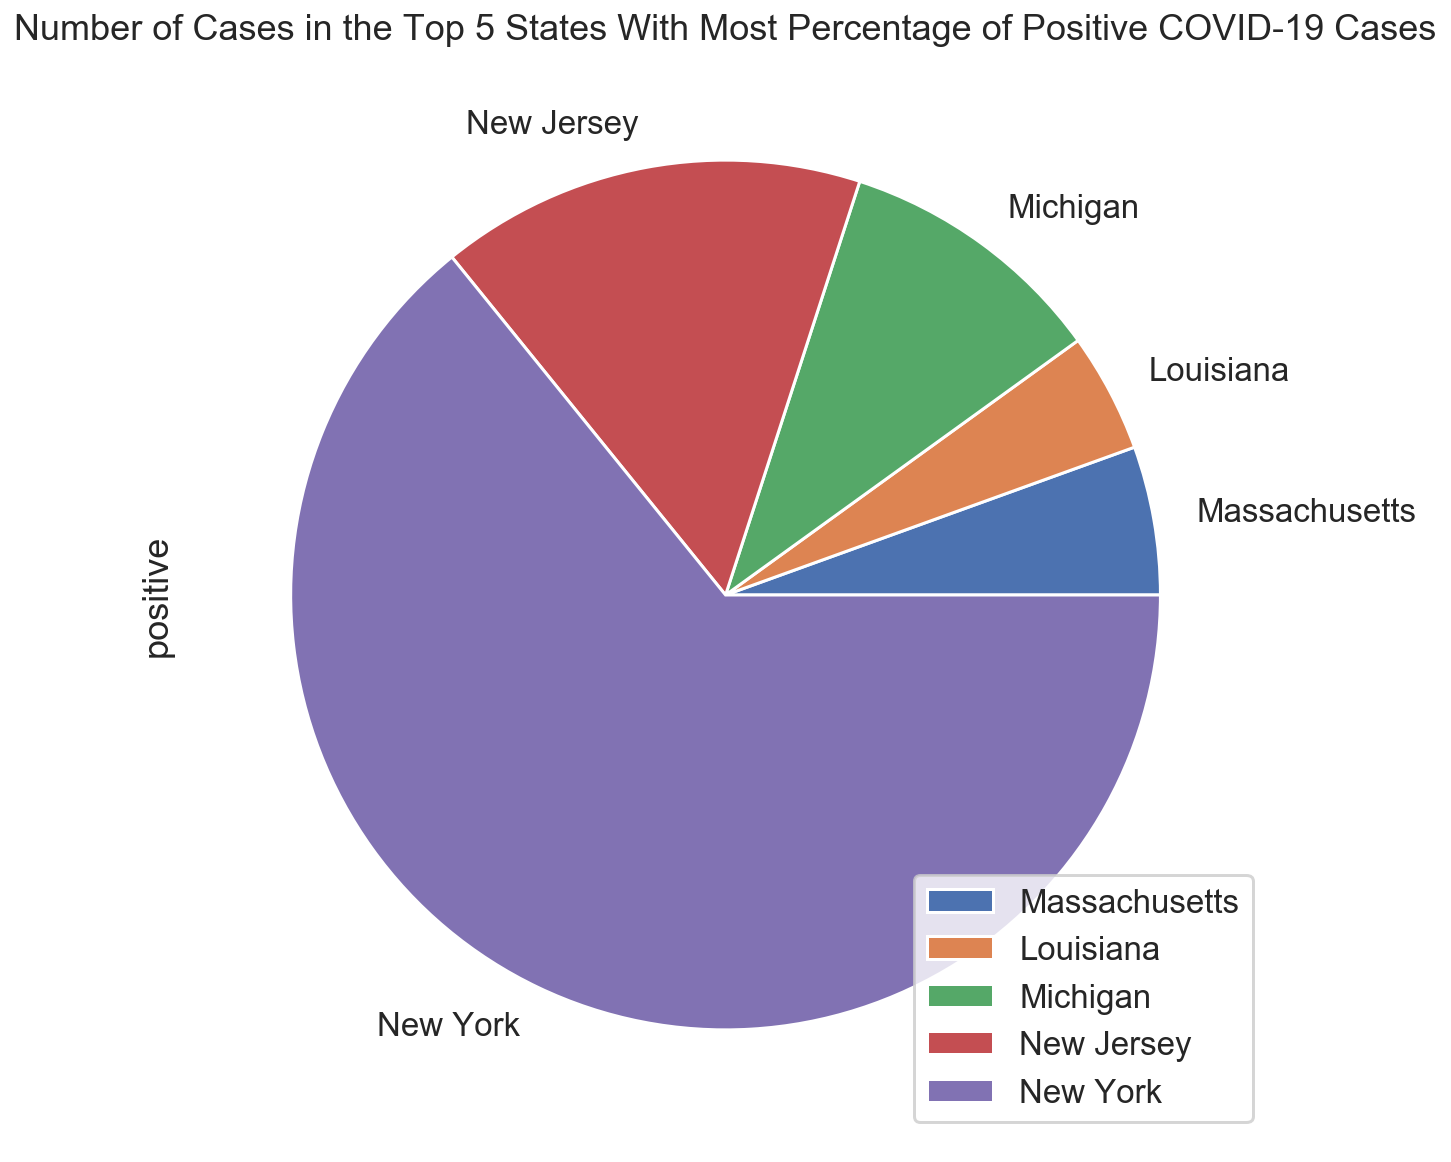

In [26]:
df_max_five.plot(kind = 'pie', x = df_max_five.index, y = 'positive', figsize = (20, 10), title = 'Number of Cases in the Top 5 States With Most Percentage of Positive COVID-19 Cases');
plt.legend(loc = 'lower right') 
plt.show()

The second visualization that we chose was a bar chart that specifically showed the percentage of positive COVID-19 cases across the top five highest percentage COVID-19 cases. This chart reiterated the fact that New York was the state with the greatest positive COVID-19 cases with New Jersey following behind. 

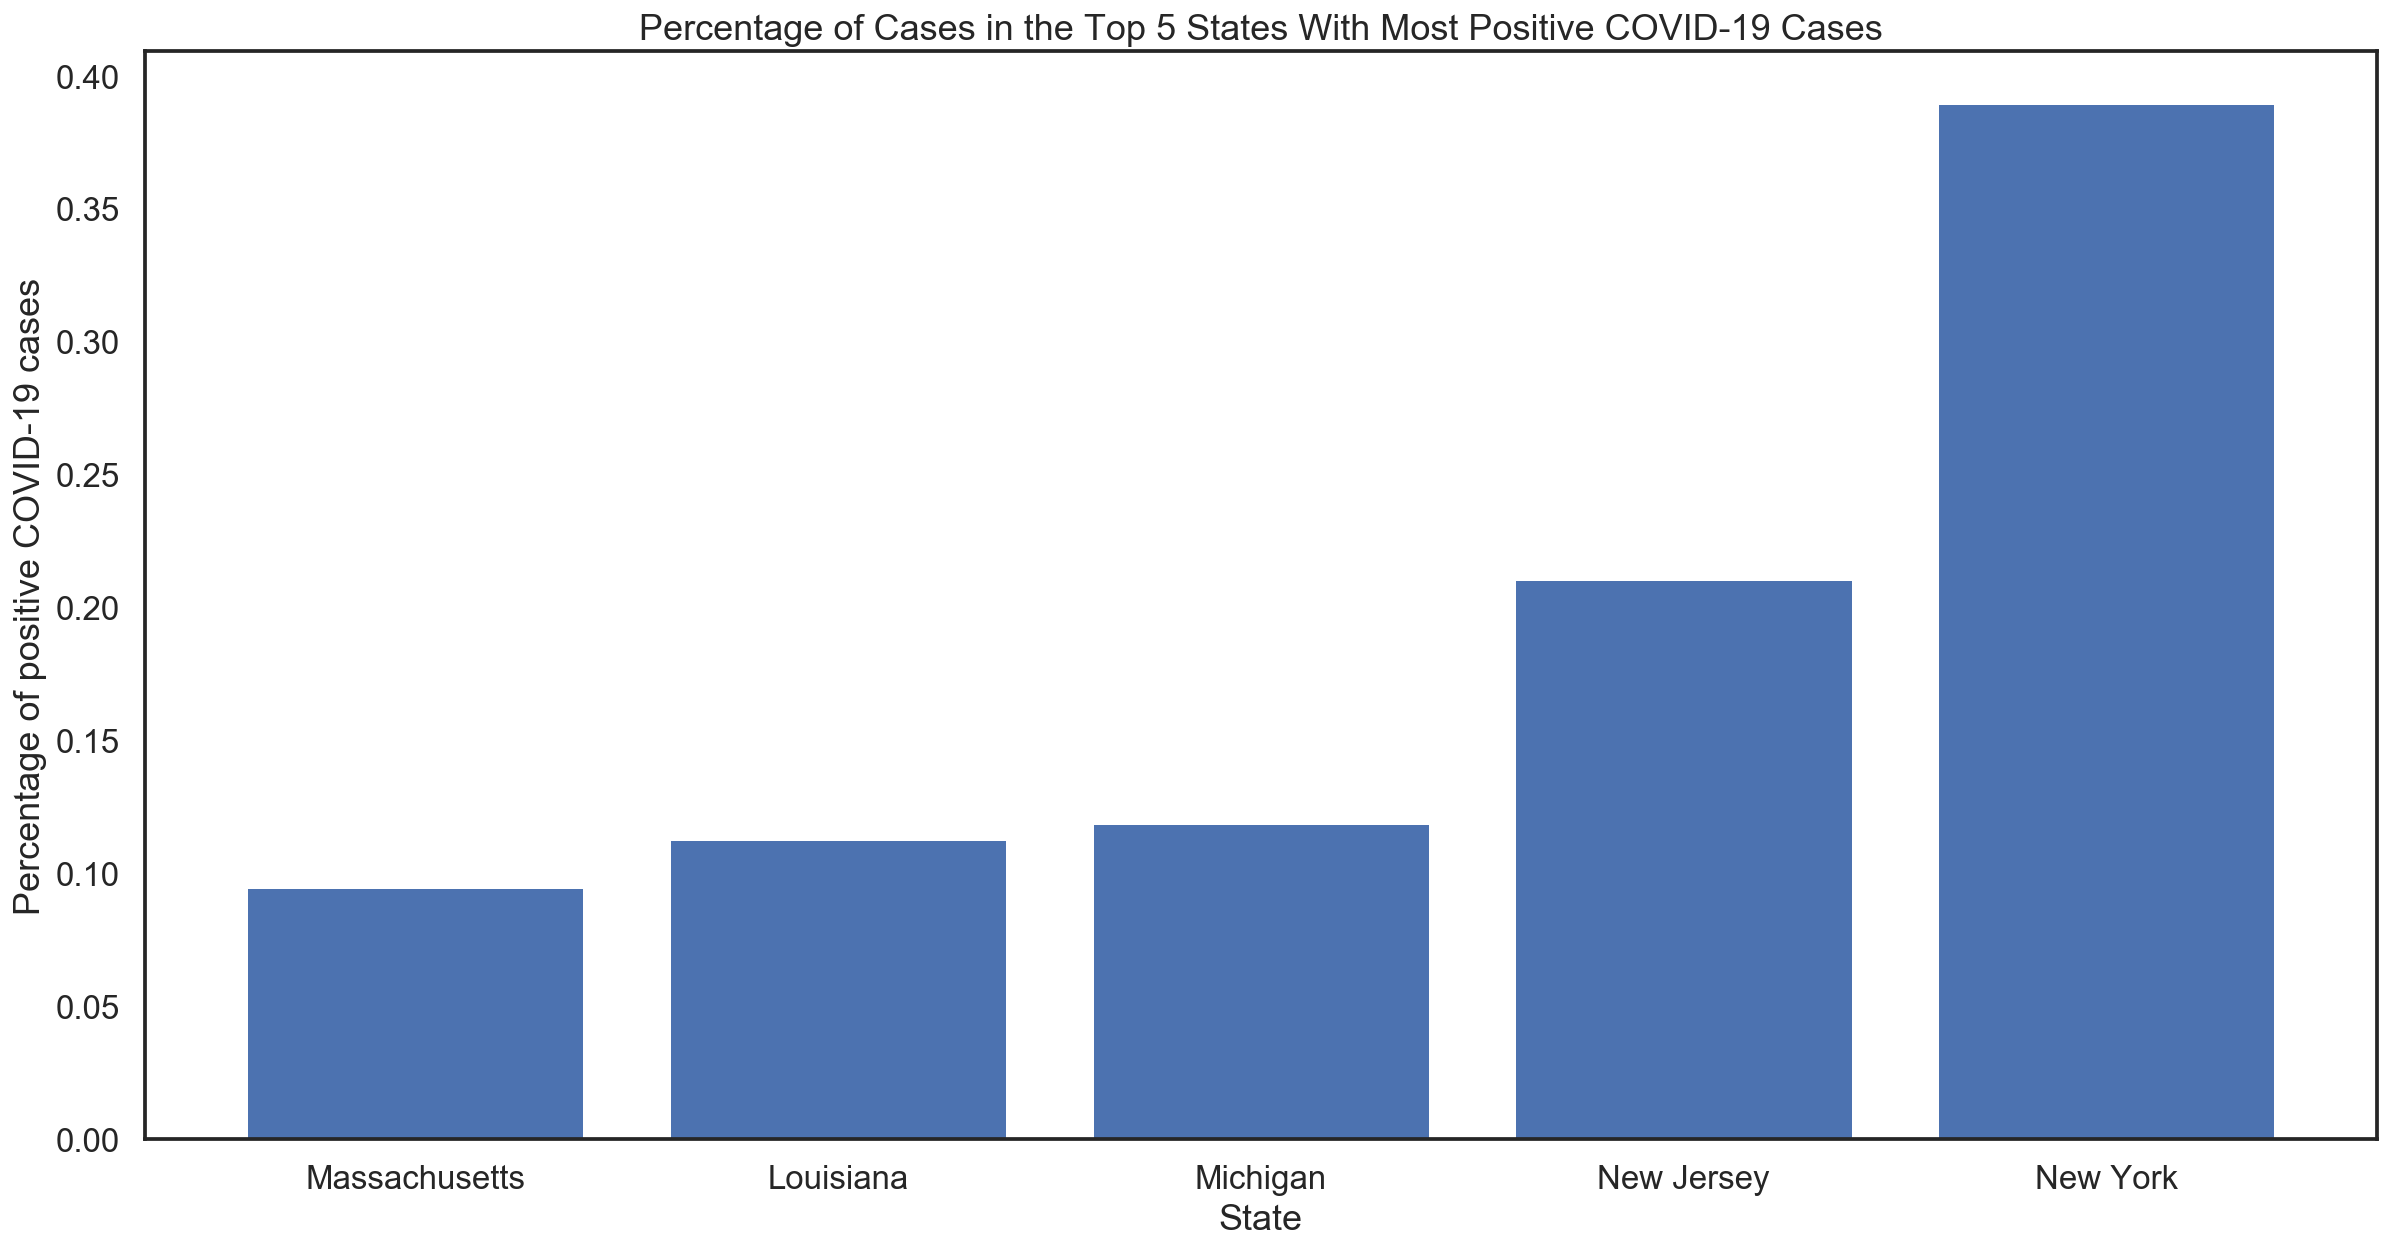

In [27]:
plt.figure(figsize = (20,10))
plt.bar(x = df_max_five.index, height = df_max_five['percentage']);
plt.xlabel('State')
plt.ylabel('Percentage of positive COVID-19 cases')
plt.title('Percentage of Cases in the Top 5 States With Most Positive COVID-19 Cases')
plt.grid(False)
plt.show()

Next, we decided to create a series of graphs that exemplified the relationship between the number of incoming flights and the number of positive COVID-19 cases. We did this for the top five states with the greatest percentage of positive COVID-19 cases.

Here we created a dataframe that maps the increase of coronavirus cases by day for each state.

In [28]:
# get the increase cases of each day
virus_increase = virus_info.copy()
for i in range(len(virus_increase) - 1, 0, -1):
    virus_increase.values[i] = virus_increase.values[i] - virus_increase.values[i - 1]
    
virus_increase.head()

state_name,Louisiana,Massachusetts,Michigan,New Jersey,New York
date,,,,,
2020-03-01,0.0,0.0,9.0,0.0,0.0
2020-03-02,0.0,0.0,9.0,0.0,0.0
2020-03-03,0.0,0.0,16.0,0.0,0.0
2020-03-04,0.0,0.0,18.0,0.0,6.0
2020-03-05,0.0,0.0,20.0,1.0,16.0


In [29]:
#create a function to plot a graph that shows two variables: the number of flights and 
#number of positive virus cases
def plot_flight_vs_virus(state_name):
    fig, ax_1 = plt.subplots(figsize = (10,6))
    
    ax_1.set_xlabel('March 2020', fontsize = 20, fontweight = 0)
    ax_1.set_ylabel('Number of Arriving Flights', color = 'tab:blue', fontsize = 20, fontweight = 0)
    ax_1.plot(flight_info.index, flight_info[state_name], color = 'tab:blue')
    ax_1.xaxis.set_ticks_position('bottom')
    plt.xticks(fontsize = 15)
    
    ax_2 = ax_1.twinx()
    ax_2.set_ylabel('Increase in Number of Positive COVID-19 Cases', color = 'tab:red', fontsize = 20, fontweight = 0)
    ax_2.plot(virus_increase.index, virus_increase[state_name], color = 'tab:red')
    
    ax_1.grid(False)
    ax_2.grid(False)
    
    plt.title('Destination State: %s' % state_name, fontsize = 20, fontweight = 0)
    plt.setp(ax_1.xaxis.get_majorticklabels(), rotation=90)
    
    plt.show()

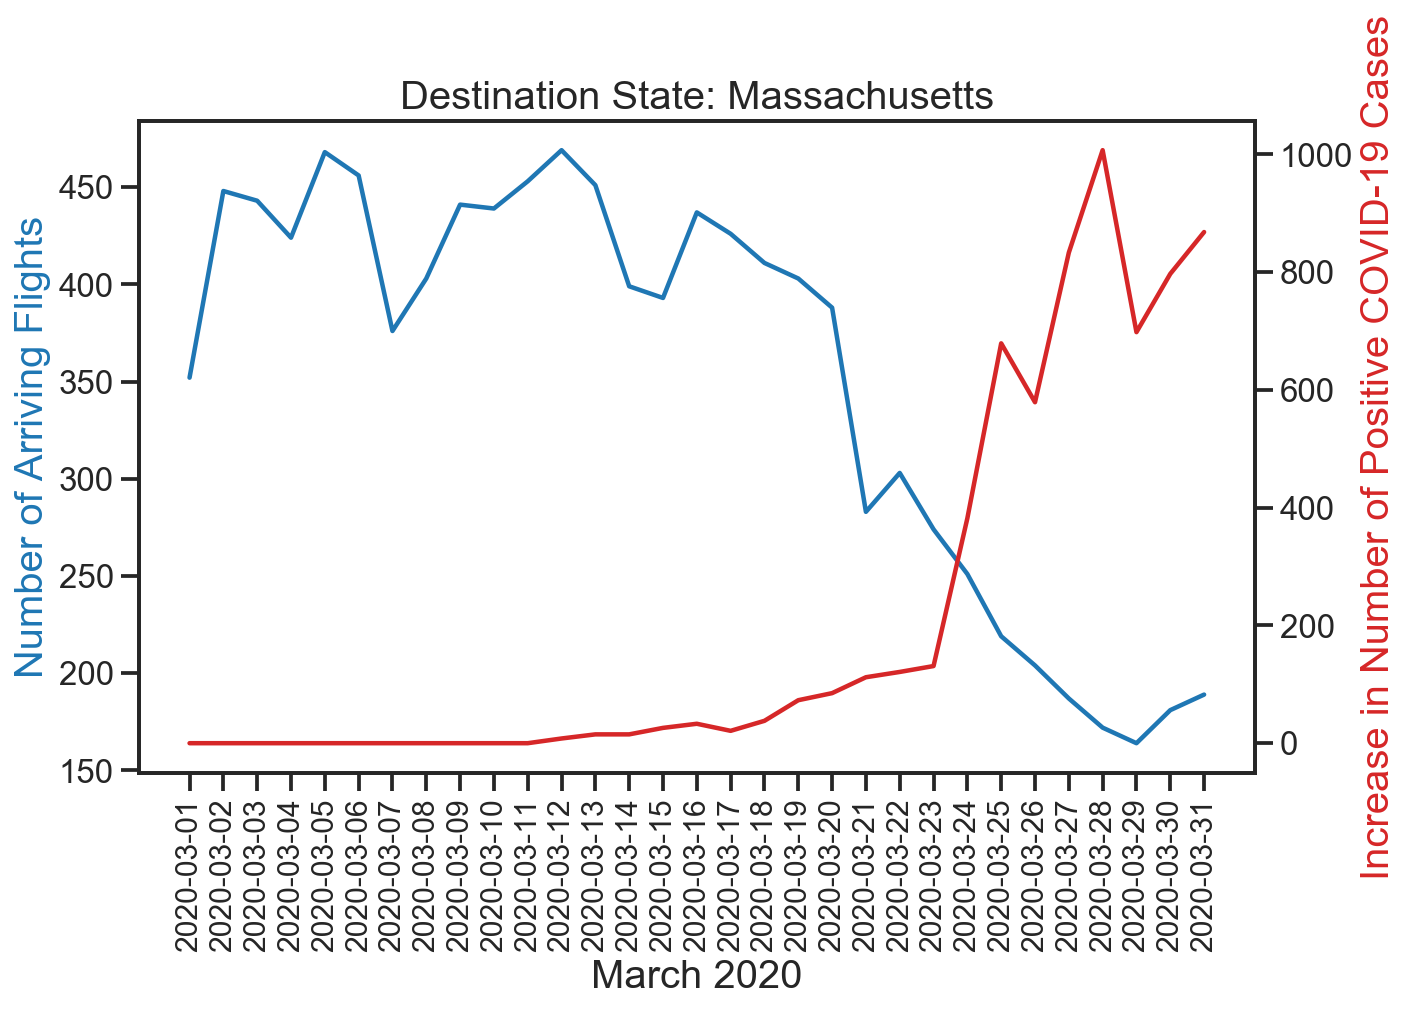

In [30]:
# Massachusetts
plot_flight_vs_virus(df_max_five.index[0])

For starters, we began the series with data from Massachusetts. However, there seems to be a negative correlation between the two variables. There was an overall downward trend for the number of arriving flights and an overall upwards trend for the increase in the number of positive COVID-19 cases. Towards the end of the month of March, we can see that the incoming flights decreases quickly when the increase in positive COVID-19 cases starts increasing significantly.

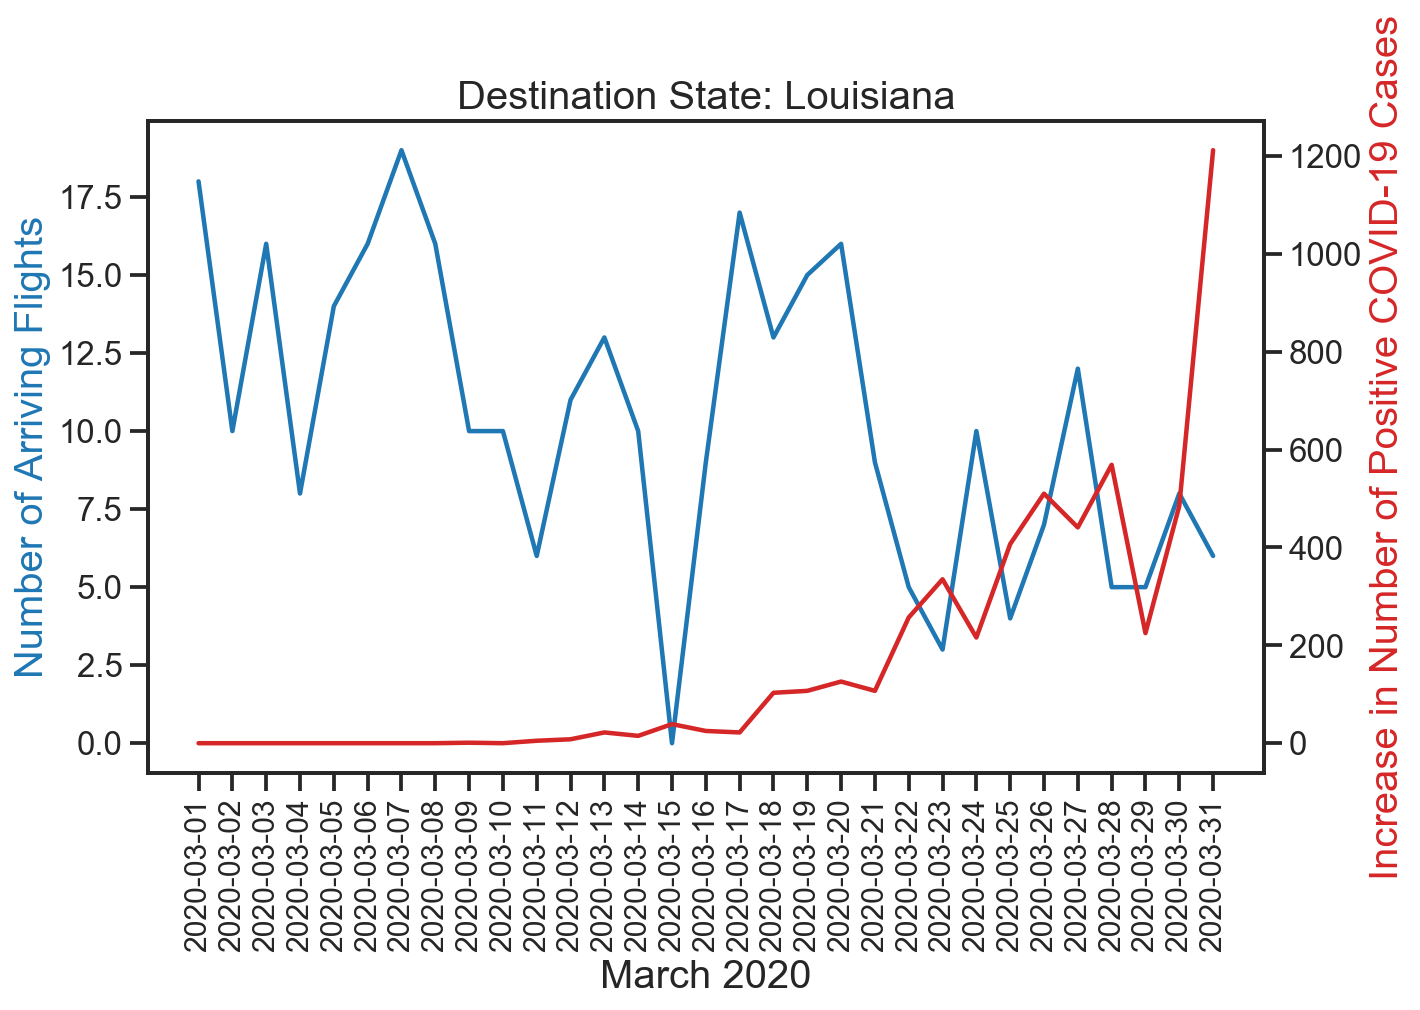

In [31]:
# Louisiana
plot_flight_vs_virus(df_max_five.index[1])

We created the same visualization for Louisiana. This showed no correlation between incoming flights and the positive COVID-19 cases. This might possibly be due to no flight restrictions that were being placed during the month of March for Louisiana.

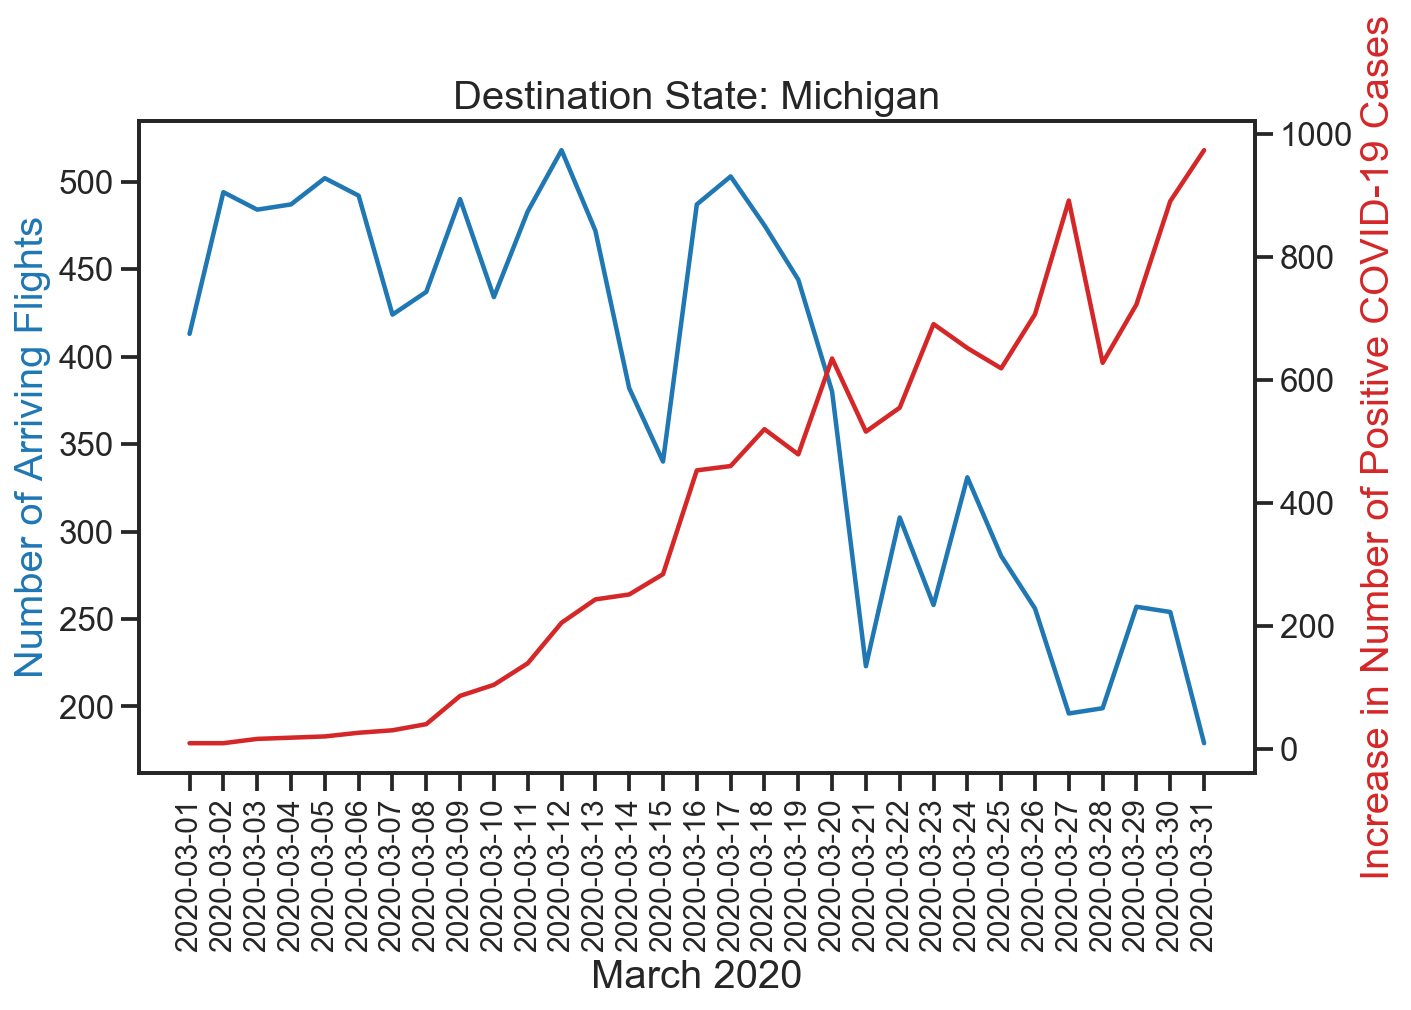

In [32]:
# Michigan
plot_flight_vs_virus(df_max_five.index[2])

The visualization for Michigan showed a negative correlation between the two variables. However, this graph is similar to that of the state of Massachusetts, whereby there is an overall downward trend in the number of flights arriving to Michigan, and an overall upward trend in the increase in the number of positive COVID-19 cases.

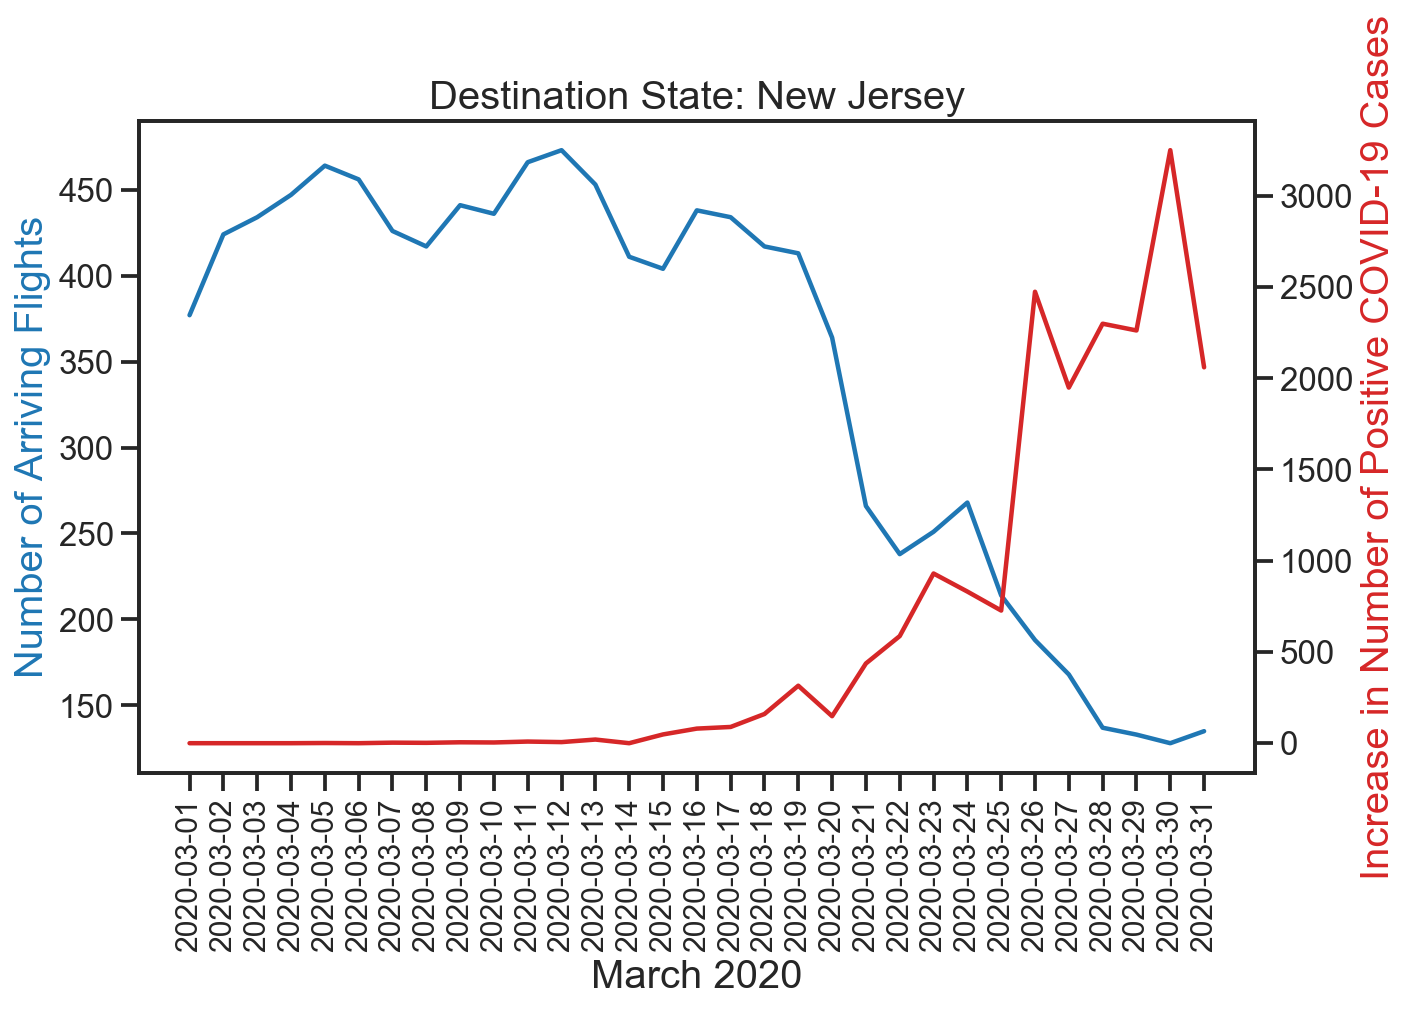

In [33]:
# New Jersey
plot_flight_vs_virus(df_max_five.index[3])

The graph for New Jersey also showed negative correlation between the variables of interest. Again, there is a downward trend in the number of arriving flights in New Jersey, and an increasing trend in the number of positive COVID-19 cases.

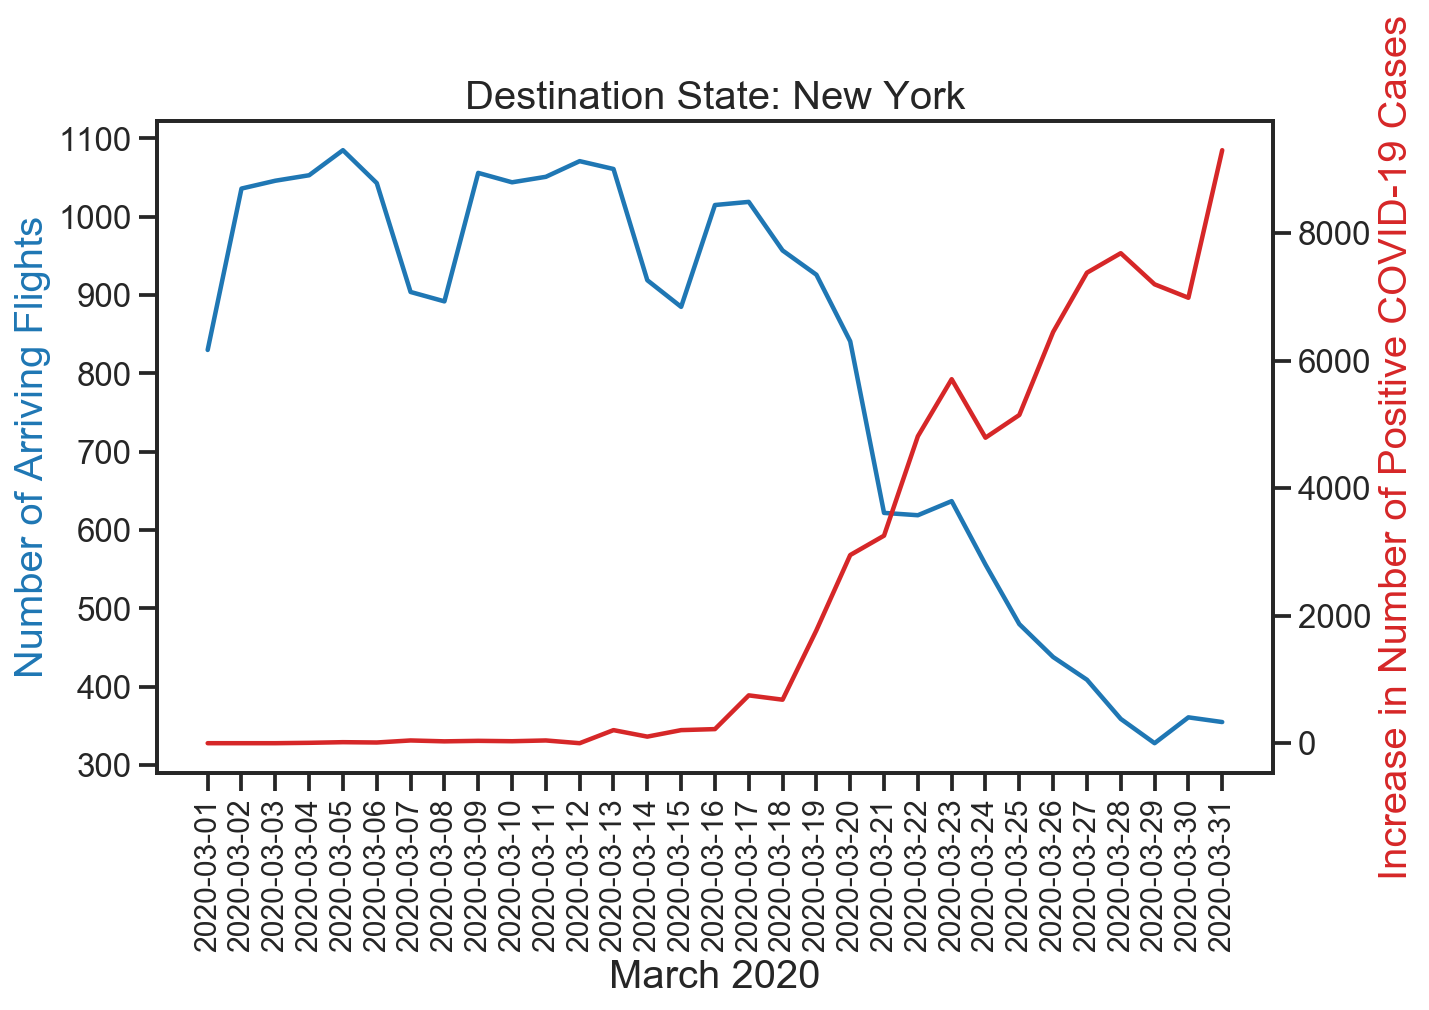

In [34]:
# New York
plot_flight_vs_virus(df_max_five.index[4])

Lastly, the visualization for New York also shows a negative correlation, showing an overall decrease towards the end of March for the number of arriving flights and an overall increase for the increase in number of COVID-19 cases.

# Data Analysis

## OLS Models

To analyze the relationship between the variables, we performed statistic tests using the OLS models on the top five states with the greatest percentage of positive COVID-19 cases. According to the analysis below, all top five states (New York, New Jersey, Michigan, and Massachusetts) except Louisiana showed a relationship between incoming flights and positive COVID-19 cases in accordance with the p-value and an alpha significance of 0.01.

What's the effect of incoming flights on COVID'19 positive cases? (alpha = 0.01)

$H_o$: There is no relationship between incoming flights and COVID-19 positive cases. ($\beta = 0$)

$H_a$: There is a relationship between incoming flights and COVID-19 positive cases. ($\beta \ne 0$)

In [35]:
def ols_models(state):
    df_temp_state = virus_info[state]
    outcome, predictors = patsy.dmatrices('virus_info[state] ~ flight_info[state]')
    mod = sm.OLS(outcome, predictors)
    res = mod.fit() 
    print(res.summary())

In [36]:
def ols_models_confounding(state):
    df_temp_state = virus_info[state].copy()
    outcome, predictors = patsy.dmatrices('virus_info[state] ~ flight_info[state] + pop_info[state]')
    mod = sm.OLS(outcome, predictors)
    res = mod.fit() 
    print(res.summary())

In [37]:
def plot_scatter(state_name, coef = 0, intercept = 0):
    global flight_info, virus_info
    plt.figure(figsize = (16,6))
    sns.scatterplot(x = virus_info[state_name], y = flight_info[state_name], data = virus_info, alpha = 0.3, s = 100)
    
    x = flight_info[state_name]
    y = x * coef + intercept
    
    plt.xlabel('Number of Flights')
    plt.ylabel('Number of COVID-19 cases')
    plt.show()

In [38]:
#Massachusetts
ols_models(df_max_five.index[0])

                            OLS Regression Results                            
Dep. Variable:      virus_info[state]   R-squared:                       0.705
Model:                            OLS   Adj. R-squared:                  0.695
Method:                 Least Squares   F-statistic:                     69.46
Date:                Wed, 10 Jun 2020   Prob (F-statistic):           3.47e-09
Time:                        23:30:37   Log-Likelihood:                -257.73
No. Observations:                  31   AIC:                             519.5
Df Residuals:                      29   BIC:                             522.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           6192.6016    645

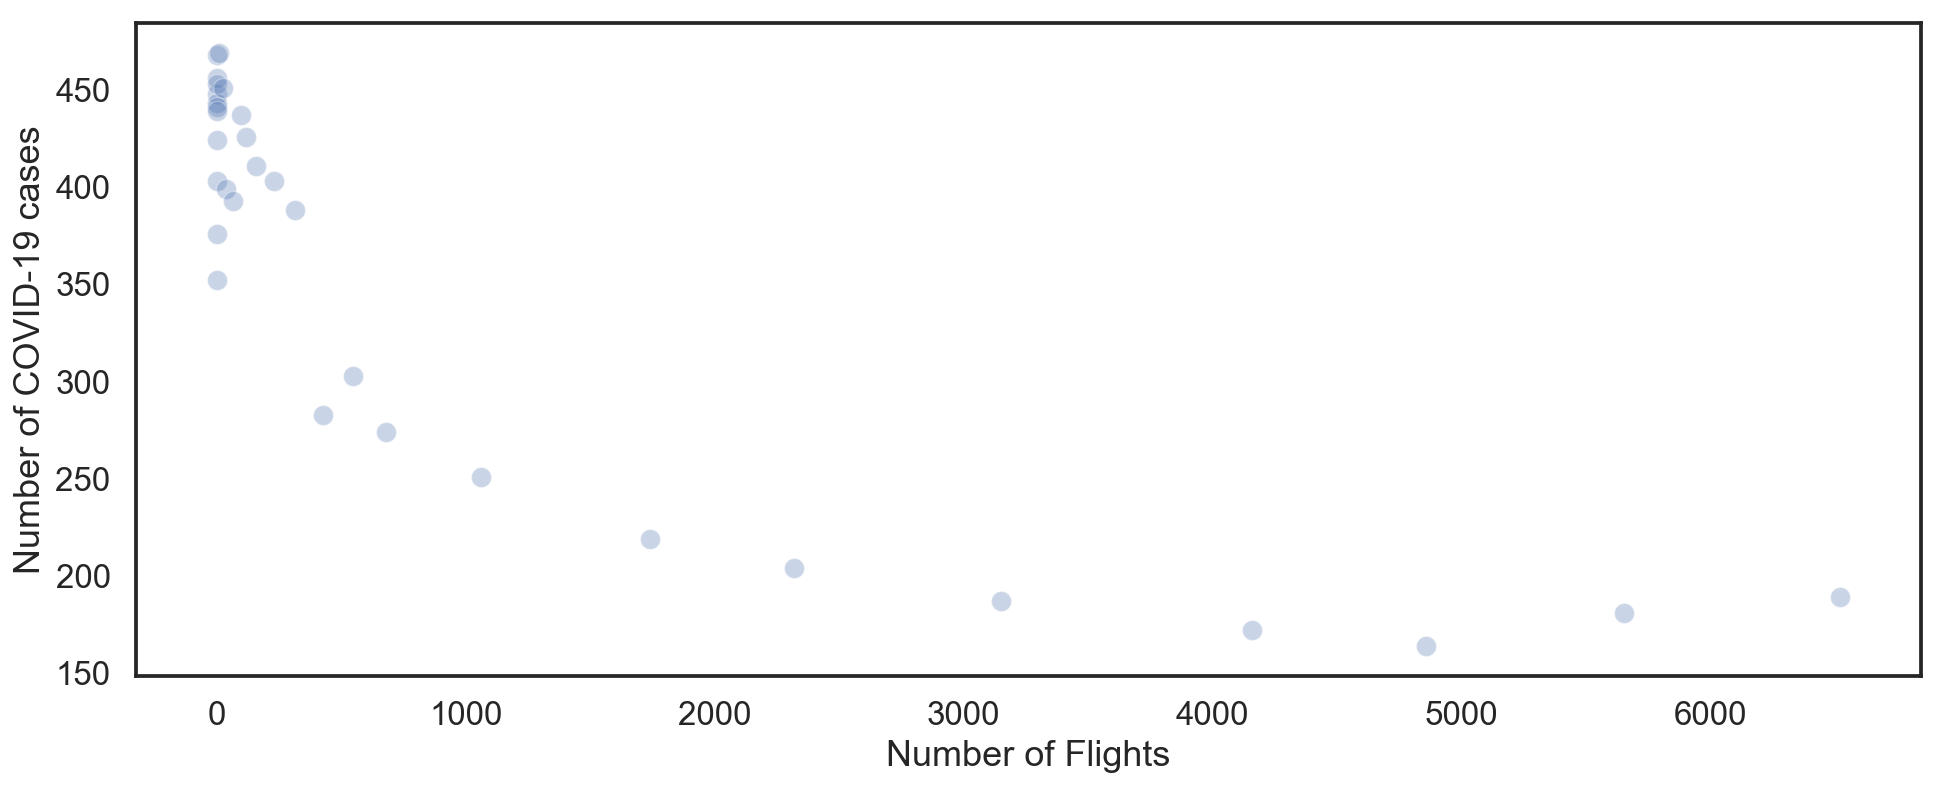

In [39]:
plot_scatter(df_max_five.index[0], -14.6527, 6192.6016)

For the state of Massachusetts, we got a p-value of 0. This value is smaller than the alpha value of 0.01, meaning that we reject the null hypothesis. This signifies that there is a relationship between the number of COVID-19 cases in Massachusetts and the number of incoming flights to that state.

In [40]:
#Louisiana
ols_models(df_max_five.index[1])

                            OLS Regression Results                            
Dep. Variable:      virus_info[state]   R-squared:                       0.198
Model:                            OLS   Adj. R-squared:                  0.170
Method:                 Least Squares   F-statistic:                     7.155
Date:                Wed, 10 Jun 2020   Prob (F-statistic):             0.0122
Time:                        23:30:37   Log-Likelihood:                -265.43
No. Observations:                  31   AIC:                             534.9
Df Residuals:                      29   BIC:                             537.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           2278.6950    560

For the state of Louisiana, we got a p-value of 0.012. This value is larger than the alpha value of 0.01, meaning that we fail to reject the null hypothesis. This signifies that there is no relationship between the number of incoming flights to Louisiana and the number of COVID-19 cases in the same state. This might be because travel restrictions have yet to be imposed in Louisiana in the month of March despite the outbreak of COVID-19. 

In [41]:
#Michigan
ols_models(df_max_five.index[2])

                            OLS Regression Results                            
Dep. Variable:      virus_info[state]   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                     99.86
Date:                Wed, 10 Jun 2020   Prob (F-statistic):           6.70e-11
Time:                        23:30:38   Log-Likelihood:                -275.67
No. Observations:                  31   AIC:                             555.3
Df Residuals:                      29   BIC:                             558.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           1.492e+04   1190

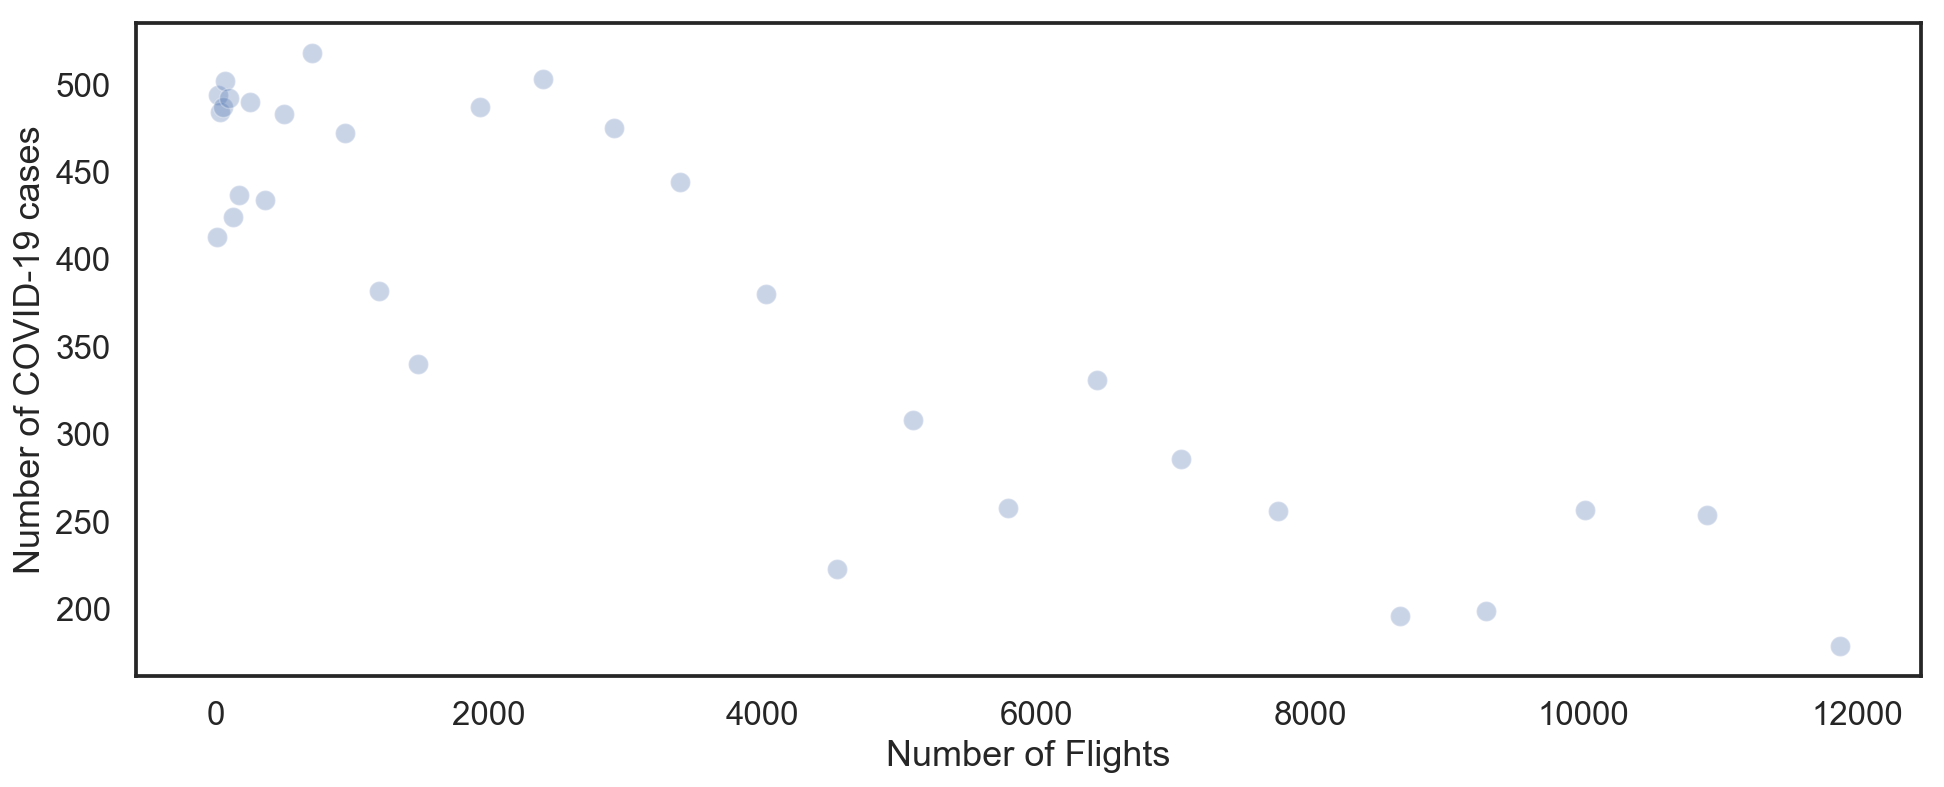

In [42]:
plot_scatter(df_max_five.index[2], -29.8206, 1.492e+04)

For the state of Michigan, we got a p-value of 0. This is lesser than the alpha value of 0.01, meaning that we reject the null hypothesis. This signifies that there is a relationship between the number of incoming flights in Michigan and the number of COVID-19 cases in the same state.

In [43]:
#New Jersey
ols_models(df_max_five.index[3])

                            OLS Regression Results                            
Dep. Variable:      virus_info[state]   R-squared:                       0.759
Model:                            OLS   Adj. R-squared:                  0.751
Method:                 Least Squares   F-statistic:                     91.36
Date:                Wed, 10 Jun 2020   Prob (F-statistic):           1.82e-10
Time:                        23:30:38   Log-Likelihood:                -286.96
No. Observations:                  31   AIC:                             577.9
Df Residuals:                      29   BIC:                             580.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           1.599e+04   1439

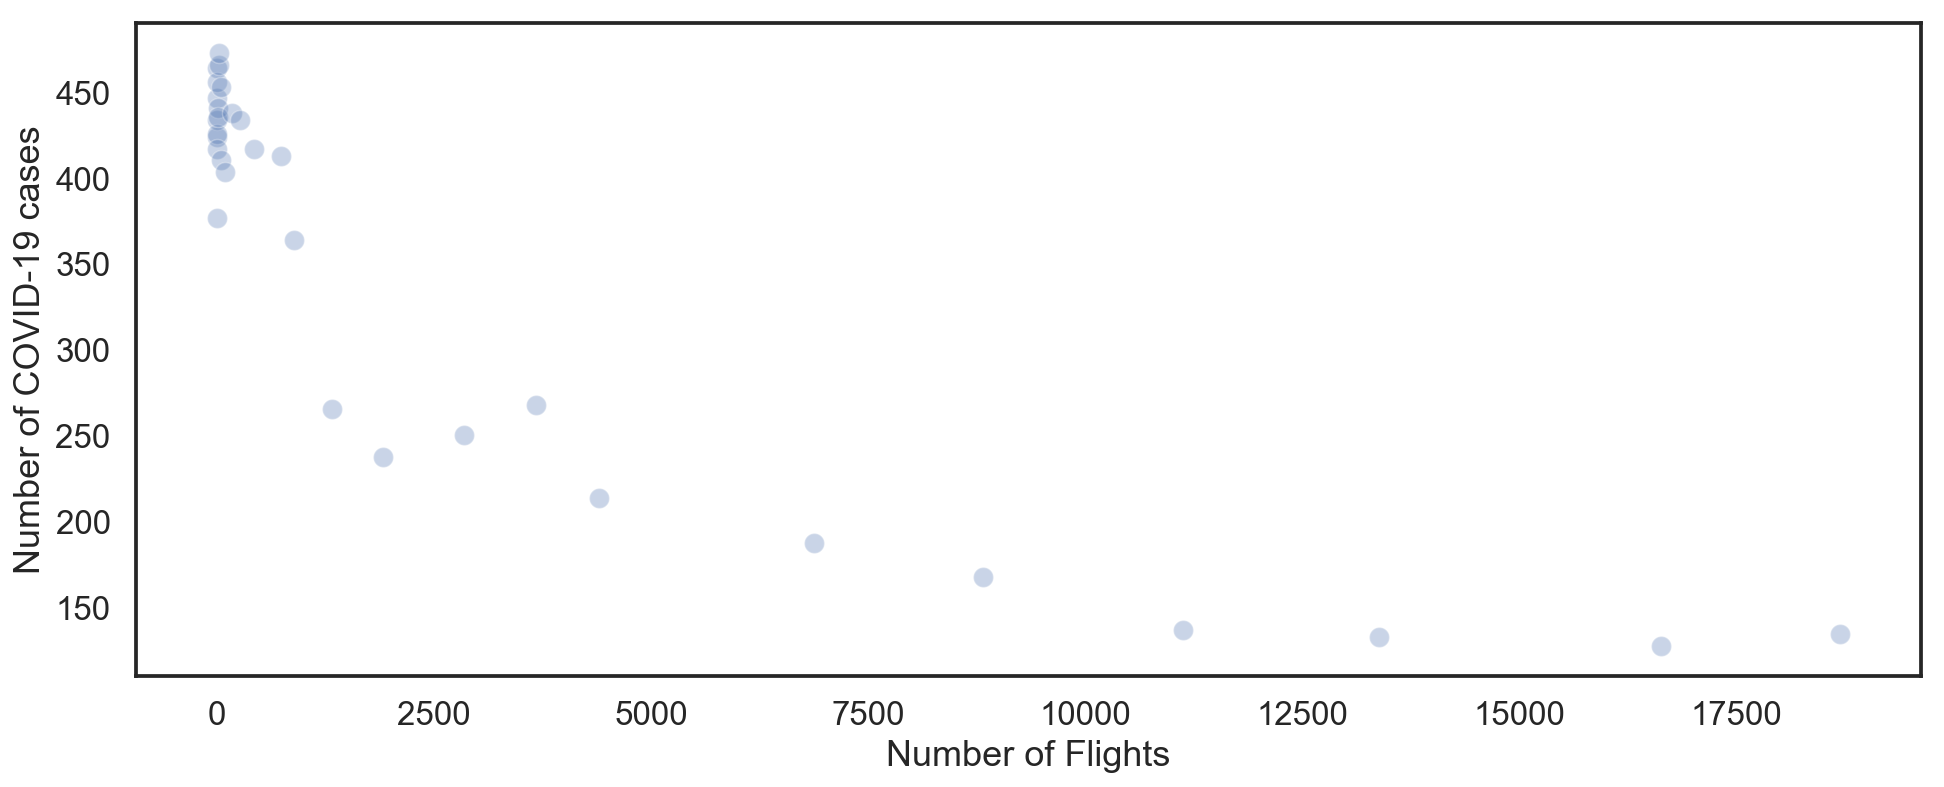

In [44]:
plot_scatter(df_max_five.index[3], -37.6069, 1.599e+04)

For the state of New Jersey, we got a p-value of 0. This is smaller than the alpha value of 0.01, meaning that we reject the null hypothesis. This means that there is a relationship between the number of incoming flights to New Jersey and the number of COVID-19 cases in the same state.

In [45]:
#New York
ols_models(df_max_five.index[4])

                            OLS Regression Results                            
Dep. Variable:      virus_info[state]   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     152.7
Date:                Wed, 10 Jun 2020   Prob (F-statistic):           4.42e-13
Time:                        23:30:38   Log-Likelihood:                -326.03
No. Observations:                  31   AIC:                             656.1
Df Residuals:                      29   BIC:                             658.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           7.701e+04   5302

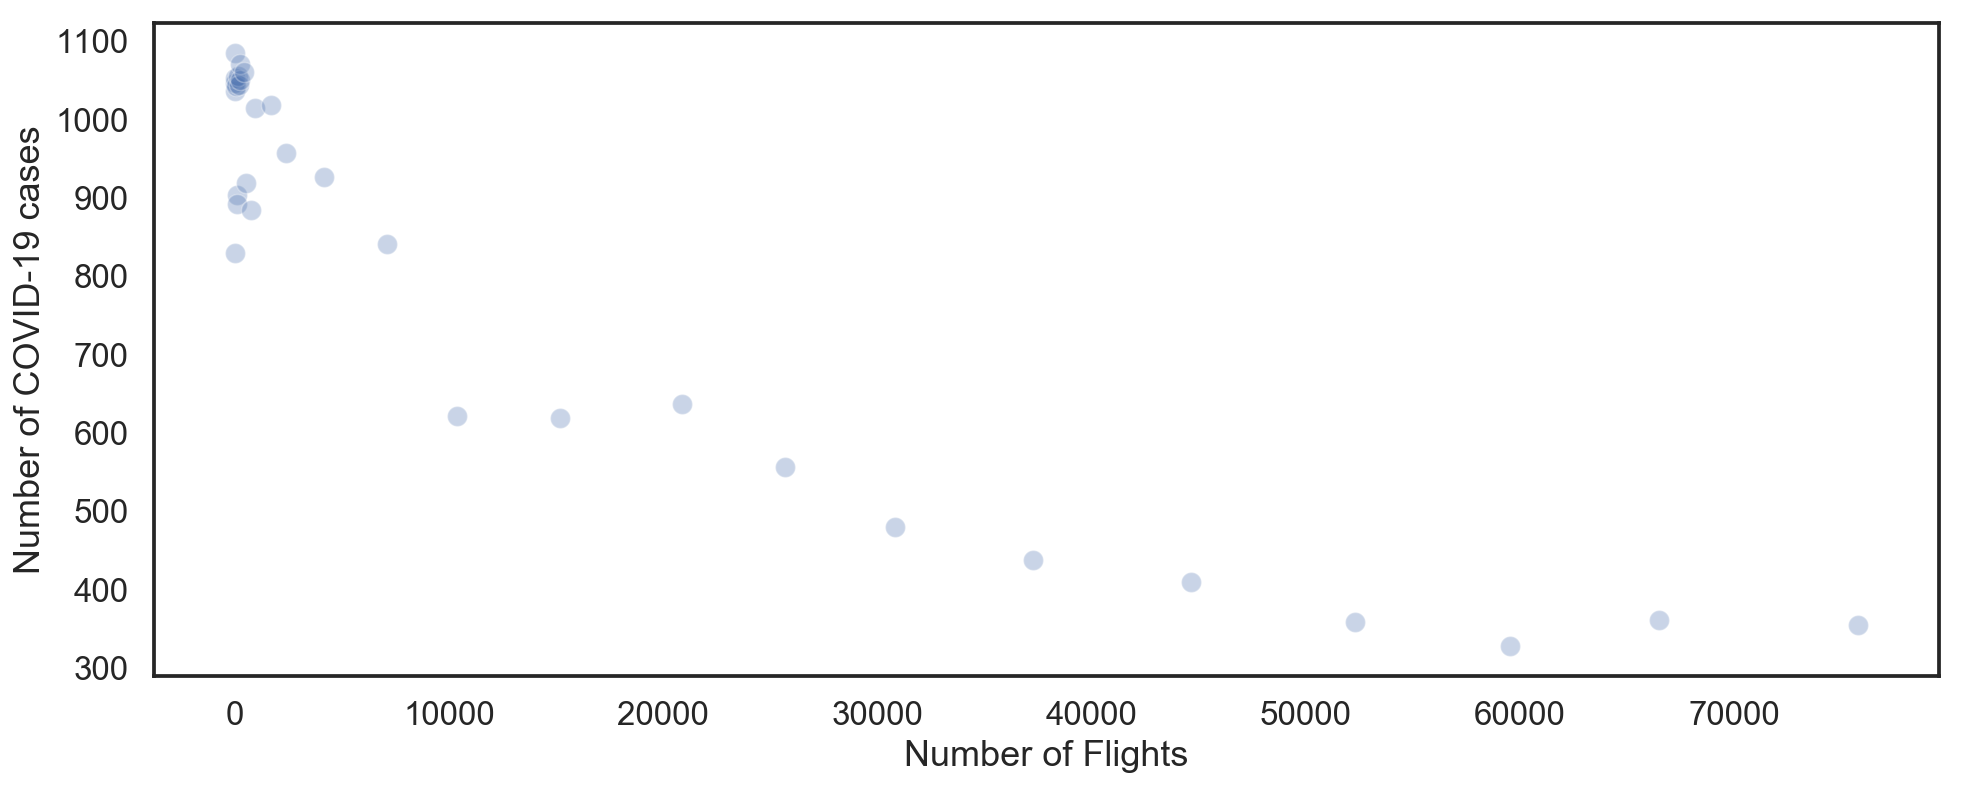

In [46]:
plot_scatter(df_max_five.index[4], -77.4900, 7.701e+04)

For the state of New York, we arrived at a p-value of 0. This is lesser than the alpha value of 0.01, meaning that we reject the null hypothesis. This signifies that there is a relationship between the number of incoming flights to New York and the number of COVID-19 cases in the same state.

### Virus and Population Merged in Dataframe

To deal with any possible confounding factors, specifically, population, we decided to merge the population and virus dataframes together for use in analysis. 

In [47]:
#modifying both virus and population so the index can be set to the state and they can be merged
df_virus_mod = df_virus_copy.set_index(keys='state') 
df_pop_mod = df_population_copy.set_index(keys='state')

#merging the dataframes together
virus_and_pop = pd.merge(df_population_copy, df_virus_copy, on=['state'])
virus_and_pop = virus_and_pop.drop(labels=['name', 'negative','total'], axis=1)

#reordering the columns for better readability
virus_and_pop = virus_and_pop[['date', 'state', 'state_name', 'positive', 'popestimate2019']]

#renaming
virus_and_pop.columns=['date','state','state_name','positive', 'population']
virus_and_pop.head()

,date,state,state_name,positive,population
0,2020-03-07,AL,Alabama,0.0,4903185
1,2020-03-08,AL,Alabama,0.0,4903185
2,2020-03-09,AL,Alabama,0.0,4903185
3,2020-03-10,AL,Alabama,0.0,4903185
4,2020-03-11,AL,Alabama,0.0,4903185


We created a new dataframe called pop_info that holds the population for each of the 5 states with the highest percentage of coronavirus. We only have a constant population value for all of the states, so we had to make each date contain the same population value. This was done for the ease of later analysis.

In [48]:
pop_info = virus_and_pop.groupby([virus_and_pop['date'], virus_and_pop['state_name']]).sum()
pop_info = pop_info.drop(['positive'], axis = 1)
pop_info = pop_info.unstack(level = -1)
pop_info = pop_info.xs('population', level = 0, axis = 1)
pop_info = pop_info[['Louisiana','Massachusetts','Michigan','New Jersey','New York']]


#We are taking population to be a constant throughout the entire month
pop_info['Louisiana'] = pop_info['Louisiana'].fillna(float(df_population[df_population['name'] == 'Louisiana'].popestimate2019.values))
pop_info['Massachusetts'] = pop_info['Massachusetts'].fillna(float(df_population[df_population['name'] == 'Massachusetts'].popestimate2019.values))
pop_info['Michigan'] = pop_info['Michigan'].fillna(float(df_population[df_population['name'] == 'Michigan'].popestimate2019.values))
pop_info['New Jersey'] = pop_info['New Jersey'].fillna(float(df_population[df_population['name'] == 'New Jersey'].popestimate2019.values))
pop_info['New York'] = pop_info['New York'].fillna(float(df_population[df_population['name'] == 'New York'].popestimate2019.values))

### Getting The Max of the Coronavirus Cases Per State

Because we only had a constant population value, we found it fitting to find the max coronavirus cases in each of the states we had flight data for. This way we could see if there is a possible correlation that would make this a confounding factor.

In [49]:
#list that will hold the index of the rows with the max values
index_to_keep = []

#list of the states in virus_and_pop
list_of_states = virus_and_pop['state'].unique()

#algorithm that checks for max values
for state in list_of_states:
    index_to_keep.append(virus_and_pop[virus_and_pop['state'] == state].positive.idxmax())

This is removing anything other than the max coronavirus value per state.

In [50]:
#only keeping the highest values for each state in the dataframe
virus_and_pop = virus_and_pop.loc[index_to_keep]

#re-setting the index
virus_and_pop.head()

,date,state,state_name,positive,population
24,2020-03-31,AL,Alabama,981.0,4903185
50,2020-03-31,AK,Alaska,119.0,731545
78,2020-03-31,AZ,Arizona,1289.0,7278717
104,2020-03-31,AR,Arkansas,523.0,3017804
132,2020-03-31,CA,California,7482.0,39512223


### ScatterPlot of Population ~ Coronavirus

To display the results from the analysis of the merge between population and virus dataframes, we decided to use a scatterplot. The scatterplot below shows the relationship between population and positive coronavirus cases.

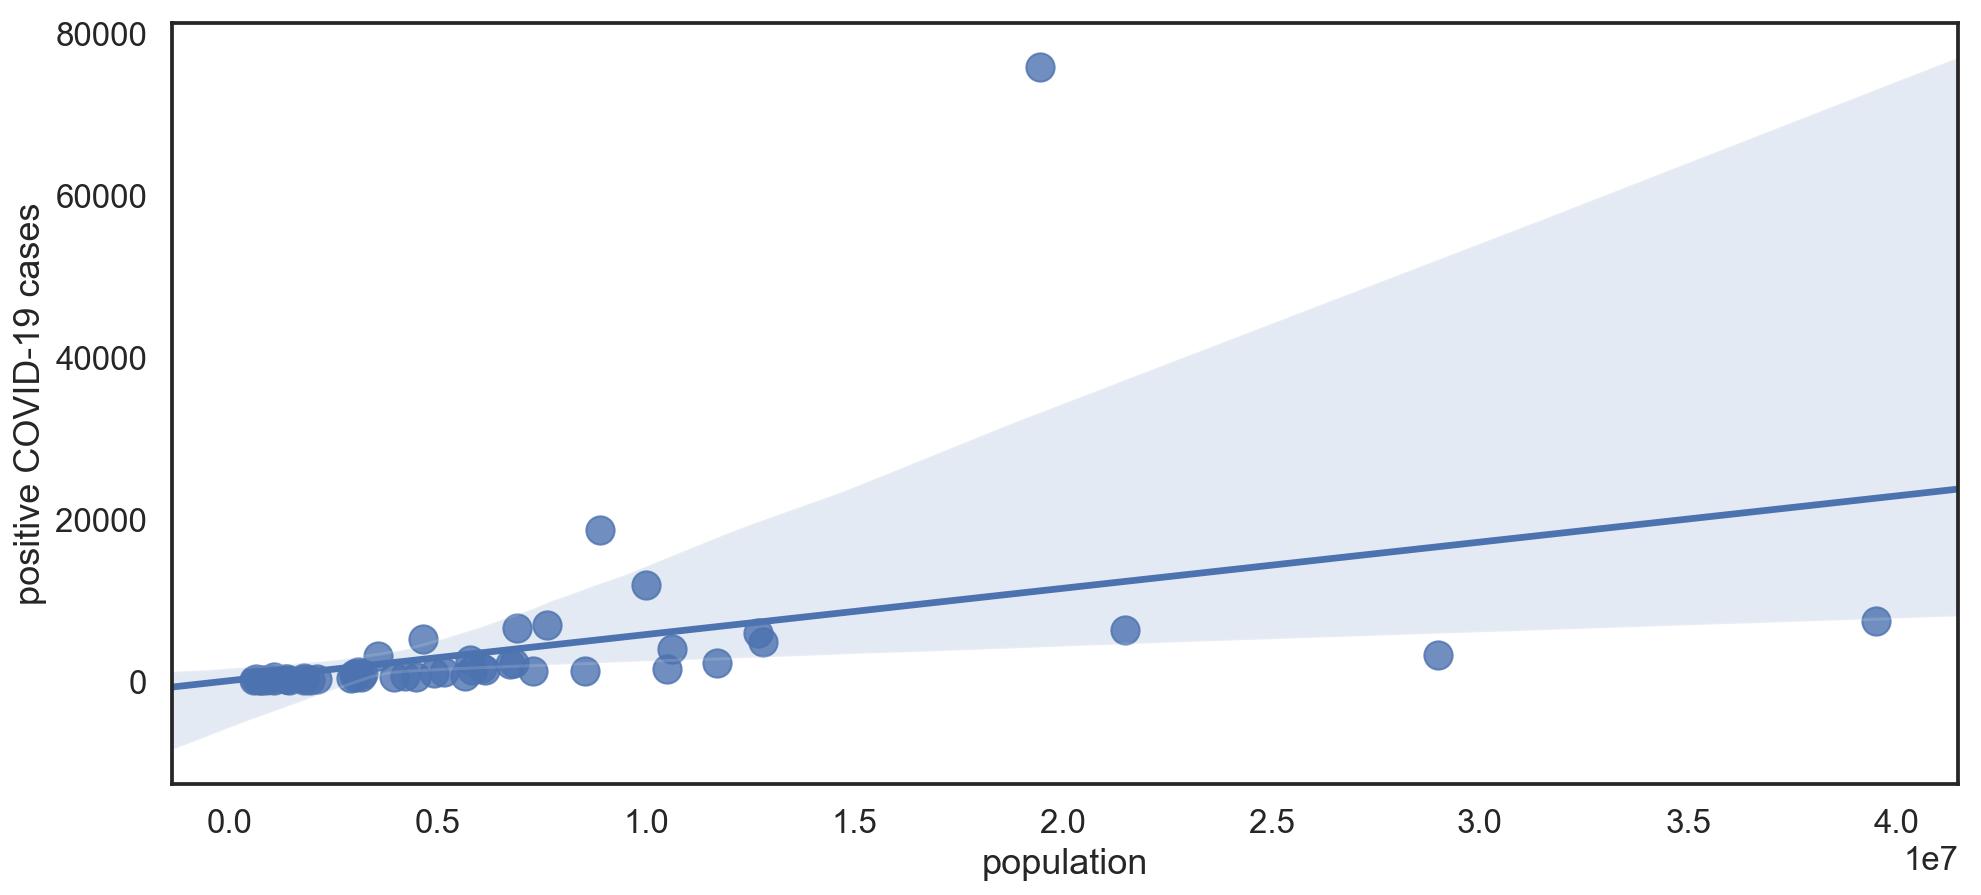

In [51]:
#creates scatter plot with linear regression
plt.figure(figsize = (16, 7))
g = sns.regplot(x="population", y="positive", data=virus_and_pop, scatter_kws={'s':200})
plt.ylabel("positive COVID-19 cases")
plt.show()

Looking at this visualization, it seems that there is a possibility that population is affecting the number of coronavirus cases. There looks to be a very weak positive correlation between the two variables. We can also see that there are some outliers which may be affecting the correlation. 

### Scatterplot of Flights ~ Population

Below we are reformatting our population information so that we can use it for a multiple colinearity analysis later on. 

In [52]:
pop_info_mod = pop_info.stack().copy()
pop_info_mod.head()

date        state_name   
2020-03-01  Louisiana         4648794.0
            Massachusetts     6892503.0
            Michigan          9986857.0
            New Jersey        8882190.0
            New York         19453561.0
dtype: float64

Here we are taking the total of incoming flights for each day for the state and concatenating that information to the population data that we have for each state. This will be used to check for multicolinearity for population and flights.

In [53]:
flight_info_mod = flight_info_mod.rename_axis(mapper=['date', 'state'])
flight_info_mod = flight_info_mod.drop(['origin'],axis = 1)

In [54]:
pop_flight = pd.concat([pop_info_mod, flight_info_mod], axis=1)
pop_flight.columns=['population','incoming_flights']
pop_flight.head()

population  incoming_flights
2020-03-01 Louisiana       4648794.0              18.0
           Massachusetts   6892503.0             352.0
           Michigan        9986857.0             413.0
           New Jersey      8882190.0             377.0
           New York       19453561.0             831.0

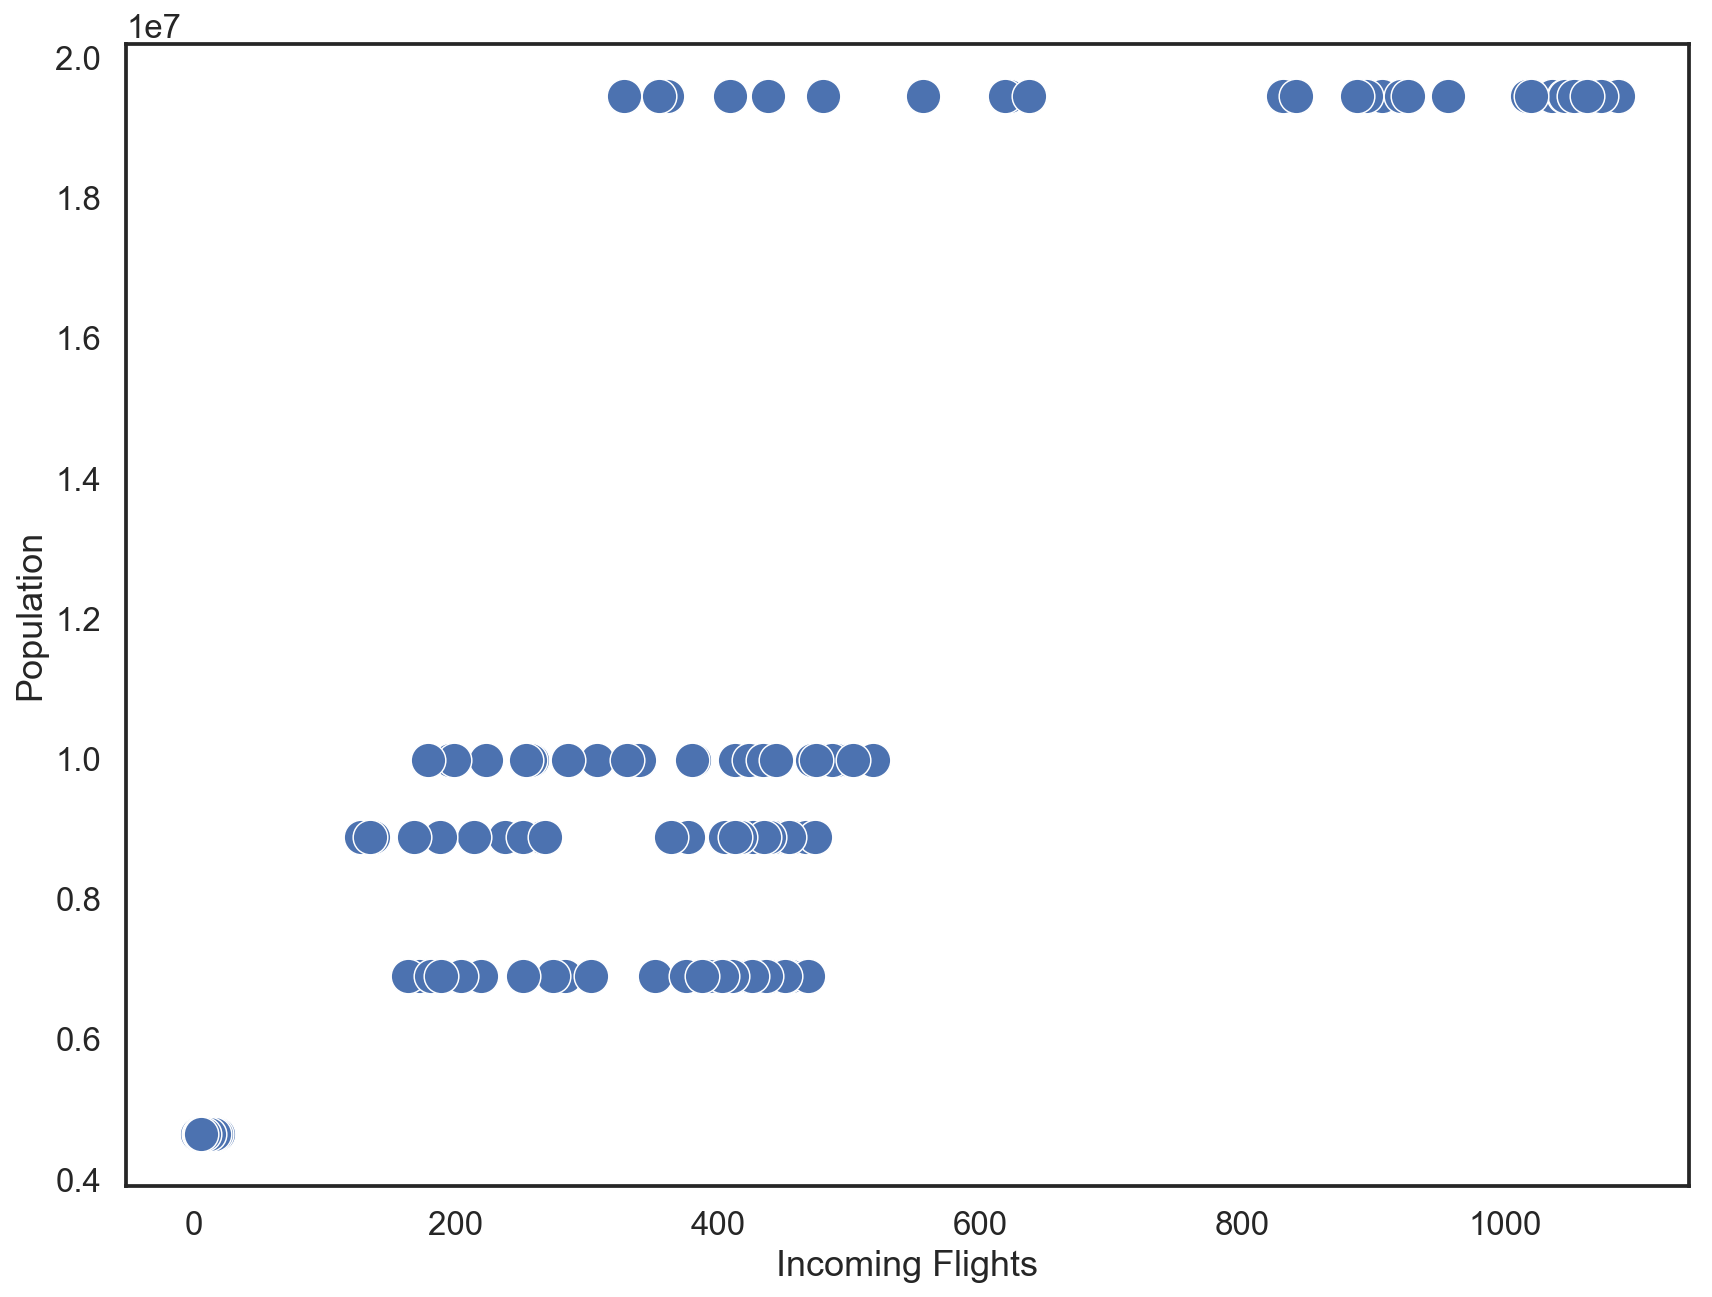

In [55]:
f = sns.scatterplot(x='incoming_flights', y='population', data=pop_flight, s=300)
f.figure.set_size_inches(14, 10.5)
plt.xlabel('Incoming Flights')
plt.ylabel('Population');

Before we can do our analysis using the OLS model on the 5 states with the highest percentage of positive COVID-19 cases, we need to check that there is no multicolinearity. This is why we plotted population vs. flights. From the scatterplot above, we can see that there is no correlation between population and total incoming flights. Since multiple linear regression assumes no multicolinearity, and there is none between our independent variables, we are able to continue with creating our OLS models.

### OLS Models Including Confounding Factor

In [56]:
ols_models_confounding(df_max_five.index[0])

                            OLS Regression Results                            
Dep. Variable:      virus_info[state]   R-squared:                       0.705
Model:                            OLS   Adj. R-squared:                  0.695
Method:                 Least Squares   F-statistic:                     69.46
Date:                Wed, 10 Jun 2020   Prob (F-statistic):           3.47e-09
Time:                        23:30:41   Log-Likelihood:                -257.73
No. Observations:                  31   AIC:                             519.5
Df Residuals:                      29   BIC:                             522.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           1.304e-10   1.36

For the state of Massachusetts, both variables have a small p-value (<0.01) but flight has a large negative effect on the data because of the large negative coefficient value. On the other hand, population has a small positive effect on the data which is overpowered by the flight data. 

In [57]:
ols_models_confounding(df_max_five.index[1])

                            OLS Regression Results                            
Dep. Variable:      virus_info[state]   R-squared:                       0.198
Model:                            OLS   Adj. R-squared:                  0.170
Method:                 Least Squares   F-statistic:                     7.155
Date:                Wed, 10 Jun 2020   Prob (F-statistic):             0.0122
Time:                        23:30:41   Log-Likelihood:                -265.43
No. Observations:                  31   AIC:                             534.9
Df Residuals:                      29   BIC:                             537.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           1.054e-10   2.59

For the state of Louisiana, population has a small p-value (<0.01) and a small positive correlation value which means that it has a small positive effect on the data. But, flight has no effect on the data due to the p-value that is larger than the alpha significance. 

In [58]:
ols_models_confounding(df_max_five.index[2])

                            OLS Regression Results                            
Dep. Variable:      virus_info[state]   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                     99.86
Date:                Wed, 10 Jun 2020   Prob (F-statistic):           6.70e-11
Time:                        23:30:41   Log-Likelihood:                -275.67
No. Observations:                  31   AIC:                             555.3
Df Residuals:                      29   BIC:                             558.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           1.496e-10   1.19

For the state of Michigan, both variables have a small p-value (<0.01) while flight data has a large negative coefficient that corresponds to a large negative effect on the data. Meanwhile, population has a small positive correlation value which means that flight has a larger effect on the data than does population. 

In [59]:
ols_models_confounding(df_max_five.index[3])

                            OLS Regression Results                            
Dep. Variable:      virus_info[state]   R-squared:                       0.759
Model:                            OLS   Adj. R-squared:                  0.751
Method:                 Least Squares   F-statistic:                     91.36
Date:                Wed, 10 Jun 2020   Prob (F-statistic):           1.82e-10
Time:                        23:30:41   Log-Likelihood:                -286.96
No. Observations:                  31   AIC:                             577.9
Df Residuals:                      29   BIC:                             580.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           2.027e-10   1.82

For the state of New Jersey, both variables have a small p-value (<0.01) while flight data has a large negative coefficient value that corresponds to a large negative effect on the data. Due to the small positive coefficient value that population carries, flight data has the largest effect on the data. 

In [60]:
ols_models_confounding(df_max_five.index[4])

                            OLS Regression Results                            
Dep. Variable:      virus_info[state]   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     152.7
Date:                Wed, 10 Jun 2020   Prob (F-statistic):           4.42e-13
Time:                        23:30:41   Log-Likelihood:                -326.03
No. Observations:                  31   AIC:                             656.1
Df Residuals:                      29   BIC:                             658.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           2.035e-10    1.4

For the state of New York, both variables have a small p-value (<0.01) while again flight data has a large negative coefficient value that leads to a large negative effect on the data. The effect that population has on the data in no way compares to the effect flight data has since population has a small positive correlation factor. 

### Pearson Correlation

In [61]:
def gen_pearson(state):
    df_f = flight_info[state]
    df_v = virus_info[state]
    df_f.name = state + '(Flight)'
    df_v.name = state + '(Virus)'
    df = pd.concat([df_f, df_v], axis = 1)
    return df.corr()

In [62]:
gen_pearson(df_max_five.index[0])

,Massachusetts(Flight),Massachusetts(Virus)
Massachusetts(Flight),1.000000,-0.839915
Massachusetts(Virus),-0.839915,1.000000


There is a Pearson correlation of -0.839915, for which we will take the absolute value. As such, we can see that there is a strong correlation between the number of incoming flights to Massachusetts and the number of COVID-19 cases in the same state.

In [63]:
gen_pearson(df_max_five.index[1])

,Louisiana(Flight),Louisiana(Virus)
Louisiana(Flight),1.000000,-0.444852
Louisiana(Virus),-0.444852,1.000000


There is a Pearson correlation of -0.444852, for which we will take the absolute value. As such, we can see that there is a weak correlation between the number of incoming flights to Louisiana and the number of COVID-19 cases in the same state.

In [64]:
gen_pearson(df_max_five.index[2])

,Michigan(Flight),Michigan(Virus)
Michigan(Flight),1.000000,-0.880317
Michigan(Virus),-0.880317,1.000000


There is a Pearson correlation of -0.880317, for which we will take the absolute value. As such, we can see that there is a strong correlation between the number of incoming flights to Michigan and the number of COVID-19 cases in the same state.

In [65]:
gen_pearson(df_max_five.index[3])

,New Jersey(Flight),New Jersey(Virus)
New Jersey(Flight),1.000000,-0.871238
New Jersey(Virus),-0.871238,1.000000


There is a Pearson correlation of -0.871238, for which we will take the absolute value. As such, we can see that there is a strong correlation between the number of incoming flights to New Jersey and the number of COVID-19 cases in the same state.

In [66]:
gen_pearson(df_max_five.index[4])

,New York(Flight),New York(Virus)
New York(Flight),1.000000,-0.916737
New York(Virus),-0.916737,1.000000


There is a Pearson correlation of -0.916737, for which we will take the absolute value. As such, we can see that there is a very strong correlation between the number of incoming flights to New York and the number of COVID-19 cases in the same state.

# Ethics and Privacy

The ethics and privacy of this research question has been taken into consideration throughout the entire project. In general, the question may provoke some ethical concerns due to its presence in all news media outlets across the United States. The topic of COVID-19 may create some negative attitudes towards Chinese individuals, as well as towards more privileged people who have easier access to testing. While this could be the case, we hope to bring more awareness towards how COVID-19 is spread rather than blaming individuals. The research question is more so focused on the count of the data rather than the specific humans involved so consent was not necessary. To avoid any issues with PII exposure, we only gathered counts based on COVID-19 cases (both positive and negative) and incoming flights during the month of March- rather than any information pertaining to specific humans.To avoid sources of bias, we made sure to only take into account the usage of reputable sources. To control for biases in our own research analysis, we performed analyses on our data that went against our assumption that there would be a correlation between incoming flights and the number of positive COVID-19 cases. Furthermore, we took into account confounding variables by also studying the effect that population would have on the correlation. Depending on our results, the problems that could arise is the usage of our data analysis to blame certain countries/states for the rise of COVID-19 across the United States. 

# Conclusion and Discussion

From the analysis above, we can conclude that there is no direct correlation between the number of flights in a state and the number of COVID-19 cases in the same state.

There has been consistent negative correlations observed in four states; however, there the state of Louisiana is an exception, which leads us to be unable to confirm that there is a negative correlation. While we had sufficient information from both the COVID-19 and flight datasets, and both datasets were recent and up-to-date, there were many attributes that contributed to the fluctuation of the  number of COVID-19 cases like  how far housing is spaced in a state for example.

In terms of the confounding variable, population, we see that all five top states with the highest percentage of COVID-19 cases are at least minimally impacted by population size while the largest impact is due to flights. The only state that was solely impacted by population size was Louisiana. This could be due to the fact that its' population is decently sized and the amount of incoming flights is smaller than the other four states. 

While we still think that the number of incoming flights to a particular state does have an effect on the number of COVID-19 cases to some extent, since the basis of the virus transmission is being in close proximity with other people or human contact, since there were many factors that influenced the change in the number of COVID-19 cases, it was challenging to uncover how significant the factor that we were analyzing mattered to what degree. If we followed up on the project and researched even more related factors, we might be able to get a more accurate or prominent results, albeit it might be more convoluted.

Although we were unable to get a definitive conclusion out of our hypothesis, it was definitely fascinating to see how the relationship between the number of COVID-19 cases and the number if incoming flights was for states with a high number of cases. It would also be more interesting to see how the trend changes as we step into the later months.

# Team Contribution

- Proposal: All members
- Data Gathering: Yu Xuan Yong, Yi Ting Wang
- Data Cleaning: Yu Xuan Yong, Yi Ting Wang
- Data Visualization: Yu Xuan Yong, Yi Ting Wang
- Data Analysis: Yu Xuan Yong, Yi Ting Wang, Maria Fernanda Salazar
- Explanation: Yu Xuan Yong, Yi Ting Wang, Abigail Campos, Maria Fernanda Salazar